In [1]:
#pip install summarytools

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import metrics
import summarytools as st
from datetime import datetime

In [3]:
#I want to be able to view all columns at once so I use the set option fucntion in pandas library.
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

In [4]:
#storing dataset to variable
Prem_df = pd.read_csv("matches-1.csv")
Prem2024_2025 = pd.read_csv("prem2024.csv")


# ======================================================

# Tidying up to date Data from This Season 2024/2025

In [5]:
#Fixing this years prem data
drop2024 = ["Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16"]
Prem2024_2025.drop(drop2024, axis = 1, inplace = True)


In [6]:
StartIndex = 200
EndIndex=210
Prem2024_2025.drop(Prem2024_2025.index[StartIndex:EndIndex], inplace = True)
Prem2024_2025.tail()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,team
195,28/09/2024,Home,L,1.0,2.0,Liverpool,0.75,2.12,44.0,8.0,3.0,Wolverhampton Wanderers
196,05/10/2024,Away,L,3.0,5.0,Brentford,0.70,4.14,57.0,17.0,6.0,Wolverhampton Wanderers
197,20/10/2024,Home,L,1.0,2.0,Manchester City,1.76,1.37,22.0,3.0,2.0,Wolverhampton Wanderers
198,26/10/2024,Away,D,2.0,2.0,Brighton and Hove Albion,1.11,1.51,48.0,14.0,7.0,Wolverhampton Wanderers
199,02/11/2024,Home,D,2.0,2.0,Crystal Palace,1.65,2.65,57.0,11.0,6.0,Wolverhampton Wanderers


In [7]:
STH = "Southampton"
BHOVE = 'Brighton and Hove Albion'
ARS = "Arsenal"

Prem2024_2025["opponent"].replace({'Bnrighton and Hove Albion':BHOVE, "Southamton":STH,
                                  'Aresenal': ARS},inplace = True)

Prem2024_2025["team"].replace({'Bnrighton and Hove Albion':BHOVE,
                                  'Aresenal': ARS},inplace = True)

In [8]:
Prem2024_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      200 non-null    object 
 1   venue     200 non-null    object 
 2   result    200 non-null    object 
 3   gf        200 non-null    float64
 4   ga        200 non-null    float64
 5   opponent  200 non-null    object 
 6   xg        200 non-null    float64
 7   xga       200 non-null    float64
 8   poss      200 non-null    float64
 9   sh        200 non-null    float64
 10  sot       200 non-null    float64
 11  team      200 non-null    object 
dtypes: float64(7), object(5)
memory usage: 18.9+ KB


# ======================================================

In [9]:
#sorting the order of the seasons into correct order
#Prem_df["season"] = Prem_df["season"].sort_values().reset_index(drop=True)

In [10]:
Prem_df["comp"].unique()

array(['Premier League'], dtype=object)

In [11]:
Prem_df.shape

(4788, 28)

In [12]:
Prem_df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [13]:
Prem_df.isna().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [14]:
st.dfSummary(Prem_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 63.0 (42.9)min < med < max:0.0 < 62.0 < 182.0IQR (CV) : 59.0 (1.5),182 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACv0lEQVR4nO3dPY7aQBiA4W/CggwothAr6LhApBSUNLlBDps2XZDgAtyABiFZxgiyiB87VTaKRAIee3bnM+9Trw3FK8+O7RlMnucC+O7De38B4B5Pt/7AGNMWkZbl+Y95nr9YHgu8+m+oxph2v9//GoZhz+bk2+02McZ8I1aUdeuK2grDsDeZTF6iKDoUOXGapsFsNuvFcdwSEXWhMpL45ebQLyISRdFhMBj8tDh/2+KYd8dI4p+7Qn1ADzuS+Kq2oZYcusMsy5pRFCWPNJL4rJahlh26T6dTcLlcPh0Ohx8iYhMqKlbLUKXE0C0islwue4vFonM+nxsuvhyKq2uoImI/CUyShKHbMzyZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKjhdM3W5XJoiEhpjbE/BjiMQEYeh7vf75ul0+jwajRqNRqPwSlARdhzBH85CPR6PT0EQdMbj8WE4HCZFj0/TNJhOp4M4jp+NMduCh4dZljWLfib85Xy5dLfbtVqyXOaKzAYS9ePtuv4yV2Q2kKgfb0P9zeaKzAYS9cPtKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSo4P2TKY1Kvt7Iq41XEGrFyr7eyKuN1xFqxcq8TMOPqf0boTpi+3qj8GNqVzGZggqEChUIFSrwP6pnWLl7HaF6pIqVu5vNZmeM+S4iNsd7GzmheqTsyt3VavVxPp9/GY1Gz3W7h0uoHrK9tZUkSbuu93AJtYbqeA+XWT9U4IqKVz7fcSBUiIj/e4URKkSkmr3CXE7GCBV/KTERE3E4GWMyBRW4oqIyLlc2ECoq4XplA6GiEq5XNhAqKuXqqRiTKahAqFDhrqE/TdOg6Il3u10gIrLf74P1et15y+O1frbW7132+Hv6+gXyOL2wcYRf6AAAAABJRU5ErkJggg=="">",0(0.0%)
2,date[object],1. 2021-05-232. 2020-07-263. 2020-10-044. 2020-12-165. 2021-05-196. 2020-12-267. 2021-01-308. 2020-01-019. 2019-12-2610. 2019-08-3111. other,"40 (0.8%)26 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)24 (0.5%)23 (0.5%)23 (0.5%)21 (0.4%)4,535 (94.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cwWoaUQCG0WuQ0GxGRPBhfIg8bB/CtxFxFk3Ixi5qd60JNP2k9pxVoZtZfIzTy/27OJ/PAwoPt34A/h9iIyM2MmIjIzYyYiMjNjJiIyM2MosxxtMYY5zP55cbPwt3brnZbJ7HGGOxWHwVHH/TwzRN62ma1mOMx1s/DPfNNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVnO83y8/Pntpk/C3bNBILPwX2ZR8WYjY11FxrqKjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxpuNjMELGYMXMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGd9sZPyMkrGuImNdRcY3GxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMq6Fk7GuIuPNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMjYIZKyryHizkbGuImNdRcbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYxvNjJ+RslYV5GxriLjm42M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnXwslYV5HxZiNj8ELG4IWMow8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2RcCydj8ELm55vNlXA+w9u1X8jlZrN5vmwQ4I/M83y8NpxaTtO03u12L6vV6rV+OO7H6XT6st/v14fD4XGM8evYxhhjtVq9brfbb+nTcY+erv2lczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyyzF+XA+59YPwb/tIQ8t5no/7/X493rkeAu+5jKd+O5xyLZzPdPVauMELGf9AICM2MmIjIzYyYiMjNjJiIyM2MmIj8x0gQBAnkyXa7AAAAABJRU5ErkJggg=="">",0(0.0%)
3,time[object],1. 15:00 (17:00)2. 15:00 (16:00)3. 20:00 (22:00)4. 14:00 (16:00)5. 17:30 (19:30)6. 16:30 (18:30)7. 12:30 (14:30)8. 20:00 (21:00)9. 14:00 (15:00)10. 12:30 (13:30)11. other,"747 (15.6%)457 (9.5%)415 (8.7%)325 (6.8%)293 (6.1%)246 (5.1%)222 (4.6%)219 (4.6%)179 (3.7%)158 (3.3%)1,527 (31.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEO0lEQVR4nO3dTWojVwBG0VIwTXoiYQxejBeRxWYR2o0x1iDd9EQZZNj6K+nVDYXPWUDJg8sTVdRnbY7H4wSFP/7vP4CvQ2xkxEZGbGTERkZsZMRGRmxkxEZmM03T92mavi34Gb+Ox+OPBa/PSjy9vLz8td1un5f6gMPh8LHZbP4WHE/b7fb57e3tx263+zn64p+fn3/u9/vn9/f3b9M0ie2Le5qmadrtdj9fX1//Wegzvi90XVbGDQIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZF5mqb/3jtb4uJLXZd1ejocDh/7/f55Wui9s8Ph8DFN068lrs262CCQ2fiXWVQePdmcWtzsoXWV5RRz3L2uspxirkfXVZZT3MxDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyY

### deleting rows with non premier league teams !!!

In [15]:
Prem_df["opponent"].unique()

array(['Wolves', 'Leicester City', 'Leeds United', 'Arsenal', 'West Ham',
       'Sheffield Utd', 'Liverpool', 'Tottenham', 'Burnley', 'Fulham',
       'Manchester Utd', 'West Brom', 'Southampton', 'Newcastle Utd',
       'Chelsea', 'Brighton', 'Crystal Palace', 'Aston Villa', 'Everton',
       'Manchester City', 'Norwich City', 'Bournemouth', 'Watford',
       "Nott'ham Forest", 'Luton Town', 'Brentford'], dtype=object)

In [16]:
Prem_df["team"].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

In [17]:
Prem_df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [18]:
PREM_df_Full=Prem_df[['date',  'round', 'venue', 'team','opponent','result',
             'formation','gf', 'ga', 'xg', 'xga', 'poss',
             'referee', 'sh', 'sot', 'dist',
               'fk', 'pk', 'pkatt']]

In [19]:
Prem_df.shape

(4788, 28)

In [20]:
Prem_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [21]:
#Prem_df["date"] = pd.to_datetime(Prem_df["date"], format='%Y-%m-%d', errors='coerce')

In [22]:
Prem_df['time'] = Prem_df["time"].str.split().str[0]
#Prem_df['time'] = pd.to_datetime(Prem_df["time"].str.split().str[0], format='%H:%M').dt.time

In [23]:
Prem_df['day'].unique()

array(['Mon', 'Sun', 'Sat', 'Tue', 'Wed', 'Fri', 'Thu'], dtype=object)

In [24]:
Prem_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,NaN,Fernandinho,4-2-3-1,Andre Marriner,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,NaN,Fernandinho,4-2-3-1,Michael Oliver,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,NaN,Kevin De Bruyne,4-3-3,Mike Dean,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,NaN,Raheem Sterling,4-3-3,Anthony Taylor,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,1.2,56,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,3.5,53,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,2.5,33,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,1.8,42,NaN,Alexander Tettey,4-2-3-1,Kevin Friend,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [25]:
#Dropping colums that I know have no relevance based off CA2
drop_columns = Prem_df[["fk","season","pkatt","pk","Unnamed: 0","attendance", "notes","captain","formation", "referee", "match report","comp","round"]]
Prem_df.drop(drop_columns, axis=1, inplace=True)

In [26]:
Prem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      4788 non-null   object 
 1   time      4788 non-null   object 
 2   day       4788 non-null   object 
 3   venue     4788 non-null   object 
 4   result    4788 non-null   object 
 5   gf        4788 non-null   int64  
 6   ga        4788 non-null   int64  
 7   opponent  4788 non-null   object 
 8   xg        4788 non-null   float64
 9   xga       4788 non-null   float64
 10  poss      4788 non-null   int64  
 11  sh        4788 non-null   int64  
 12  sot       4788 non-null   int64  
 13  dist      4786 non-null   float64
 14  team      4788 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 561.2+ KB


In [27]:
Prem_df.drop_duplicates(subset = ["date", "team", "opponent", "result"],inplace=True)
Prem_df.reset_index(drop=True, inplace=True)

In [28]:
dropped_teams = Prem_df

In [29]:
# # #dropping teams that arent playing in the premeier league in 2024
# teamsDROP = ["Leeds United", "Burnley","West Brom", "West Bromwich Albion", "Sheffield United", "Luton Town", "Watford"]
# dropped_teams = prem_Team_Drop[~prem_Team_Drop['team'].isin(teamsDROP)]

In [30]:
# #dropping opponents that arent playing in the premeier league in 2024
# opponentsDROP = ["Leeds United", "Burnley", "West Brom", "Sheffield Utd", "Luton Town", "Watford"]
# dropped_teams['opponent'] = prem_Team_Drop[~prem_Team_Drop['opponent'].isin(opponentsDROP)]
# dropped_teams.reset_index(drop=True,inplace=True)

In [31]:
#Filling two nan values in distance col with mean
dist_mean=dropped_teams["dist"].mean()
dropped_teams["dist"].fillna(dist_mean, inplace=True)

In [32]:
dropped_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3800 non-null   object 
 1   time      3800 non-null   object 
 2   day       3800 non-null   object 
 3   venue     3800 non-null   object 
 4   result    3800 non-null   object 
 5   gf        3800 non-null   int64  
 6   ga        3800 non-null   int64  
 7   opponent  3800 non-null   object 
 8   xg        3800 non-null   float64
 9   xga       3800 non-null   float64
 10  poss      3800 non-null   int64  
 11  sh        3800 non-null   int64  
 12  sot       3800 non-null   int64  
 13  dist      3800 non-null   float64
 14  team      3800 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 445.4+ KB


In [33]:
MANU = "Manchester United"
WESTHam = 'West Ham United'
BHOVE = 'Brighton and Hove Albion'
WBROM = 'West Bromwich Albion'
WOLVES = 'Wolverhampton Wanderers'
SPURS = 'Tottenham Hotspur'
NEWC = 'Newcastle United'
NOTSF = 'Nottingham Forest'

dropped_teams["opponent"].replace({'Manchester Utd': MANU,'West Ham':WESTHam, 'Brighton':BHOVE,
                            'West Brom':WBROM, 'Wolves':WOLVES, 'Tottenham':SPURS,
                            'Newcastle Utd':NEWC,"Nott'ham Forest":NOTSF},inplace = True)

In [34]:
#sorting out the time and day feature
dropped_teams["DAY & TIME"] = dropped_teams['day'] + ' ' + dropped_teams['time']

colDROPPING = dropped_teams[['day','time']]
dropped_teams.drop(colDROPPING, axis=1, inplace=True)

In [35]:
#Seperating into seperate seasons

#season ranges
start_date_2019 = "2019-08-09" 
end_date_2020 = "2020-07-26"

start_date_2020 = "2020-09-12" 
end_date_2021 = "2021-05-23"

start_date_2021 = "2021-08-13" 
end_date_2022 = "2022-05-22"

start_date_2022 = "2022-08-05" 
end_date_2023 = "2023-05-28"

start_date_2023 = "2023-08-11" 
end_date_2024 = "2024-05-19"

#new datasets for each season
PL_Season_19_20 = dropped_teams[(dropped_teams["date"] >= start_date_2019) & (dropped_teams["date"] <= end_date_2020)] 
PL_Season_20_21 = dropped_teams[(dropped_teams["date"] >= start_date_2020) & (dropped_teams["date"] <= end_date_2021)] 
PL_Season_21_22 = dropped_teams[(dropped_teams["date"] >= start_date_2021) & (dropped_teams["date"] <= end_date_2022)] 
PL_Season_22_23 = dropped_teams[(dropped_teams["date"] >= start_date_2022) & (dropped_teams["date"] <= end_date_2023)] 
PL_Season_23_24 = dropped_teams[(dropped_teams["date"] >= start_date_2023) & (dropped_teams["date"] <= end_date_2024)] 
#PL_Season_23_24

In [36]:
All_years = pd.concat([PL_Season_19_20,PL_Season_20_21,PL_Season_21_22,PL_Season_22_23,PL_Season_23_24], axis = 0)
All_years.reset_index(drop=True, inplace=True)
All_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 415.8+ KB


In [37]:
PL_Season_19_20["team"].unique()

array(['Liverpool', 'Manchester City', 'Manchester United', 'Chelsea',
       'Leicester City', 'Tottenham Hotspur', 'Wolverhampton Wanderers',
       'Arsenal', 'Sheffield United', 'Burnley', 'Southampton', 'Everton',
       'Newcastle United', 'Crystal Palace', 'Brighton and Hove Albion',
       'West Ham United', 'Aston Villa', 'Bournemouth', 'Watford',
       'Norwich City'], dtype=object)

In [38]:
season_league_finish_23_24 = { 'Manchester City': 1, 'Arsenal': 2, 'Liverpool': 3, 'Aston Villa': 4,
                        'Tottenham Hotspur':5, 'Chelsea': 6, "Newcastle United":7, "Manchester United":8,
                        'West Ham United':9, 'Crystal Palace': 10, 'Brighton and Hove Albion': 11,
                        'Bournemouth':12, 'Fulham':13, 'Wolverhampton Wanderers':14, "Everton": 15,"Brentford":16,
                        'Nottingham Forest':17,'Luton Town':18, 'Burnley':19, 'Sheffield Utd':20
                        } 


season_league_finish_22_23 = { 'Manchester City':1, 'Arsenal':2, 'Manchester United':3,
                       'Newcastle United':4, 'Liverpool':5, 'Brighton and Hove Albion':6,
                       'Aston Villa':7, 'Tottenham Hotspur':8, 'Brentford':9, 'Fulham':10,
                       'Crystal Palace':11, 'Chelsea':12, 'Wolverhampton Wanderers':13,
                       'West Ham United':14, 'Bournemouth':15, 'Nottingham Forest':16, 'Everton':17,
                       'Leicester City':18, 'Leeds United':19, 'Southampton':20
                        }

season_league_finish_21_22 = { 'Manchester City':1, 'Liverpool':2, 'Chelsea':3, 'Tottenham Hotspur':4,
                       'Arsenal':5, 'Manchester United':6, 'West Ham United':7,
                       'Leicester City':8, 'Brighton and Hove Albion':9,
                       'Wolverhampton Wanderers':10, 'Newcastle United':11, 'Crystal Palace':12,
                       'Brentford':13, 'Aston Villa':14, 'Southampton':15, 'Everton':16,
                       'Leeds United':17, 'Burnley':18, 'Watford':19, 'Norwich City':20
                        }

season_league_finish_20_21 = { 'Manchester City':1, 'Manchester United':2, 'Liverpool':3, 'Chelsea':4,
                        'Leicester City':5, 'West Ham United':6, 'Tottenham Hotspur':7,
                        'Arsenal':8, 'Leeds United':9, 'Everton':10, 'Aston Villa':11,
                        'Newcastle United':12, 'Wolverhampton Wanderers':13, 'Crystal Palace':14,
                        'Southampton':15, 'Brighton and Hove Albion':16, 'Burnley':17, 'Fulham':18,
                        'West Bromwich Albion':19, 'Sheffield Utd':20
                        } 

season_league_finish_19_20 = {'Liverpool':1, 'Manchester City':2, 'Manchester United':3, 'Chelsea':4,
                       'Leicester City':5, 'Tottenham Hotspur':6, 'Wolverhampton Wanderers':7,
                       'Arsenal':8, 'Sheffield Utd':9, 'Burnley':10, 'Southampton':11, 'Everton':12,
                       'Newcastle United':13, 'Crystal Palace':14, 'Brighton and Hove Albion':15,
                       'West Ham United':16, 'Aston Villa':17, 'Bournemouth':18, 'Watford':19,
                       'Norwich City':20
                        }


In [39]:
PL_Season_23_24['Premier League Finish Position'] = PL_Season_23_24['opponent'].map(season_league_finish_23_24)
PL_Season_22_23['Premier League Finish Position'] = PL_Season_22_23['opponent'].map(season_league_finish_22_23)
PL_Season_21_22['Premier League Finish Position'] = PL_Season_21_22['opponent'].map(season_league_finish_21_22)
PL_Season_20_21['Premier League Finish Position'] = PL_Season_20_21['opponent'].map(season_league_finish_20_21)
PL_Season_19_20['Premier League Finish Position'] = PL_Season_19_20['opponent'].map(season_league_finish_19_20)



#PL_Season_23_24['Last_Season_position'].unique()

In [40]:
p19_20 = PL_Season_19_20[['Premier League Finish Position']]
p20_21= PL_Season_20_21[['Premier League Finish Position']]
p21_22= PL_Season_21_22[['Premier League Finish Position']]
p22_23= PL_Season_22_23[['Premier League Finish Position']]
p23_24 = PL_Season_23_24[['Premier League Finish Position']]

In [41]:
# p19_20.reset_index(drop=True,inplace=True)
# p20_21.reset_index(drop=True,inplace=True)
# p21_22.reset_index(drop=True,inplace=True)
# p22_23.reset_index(drop=True,inplace=True)
# p23_24.reset_index(drop=True,inplace=True)

In [42]:
p21_22

,Premier League Finish Position
2508,4
2509,20
2510,5
2511,8
2512,15
...,...
3263,14
3264,7
3265,8
3266,10


In [43]:
prem_finish_combin= pd.concat([p19_20 ,p20_21,p21_22,p22_23,p23_24], axis=0)
prem_finish_combin.reset_index(drop=True,inplace=True)
prem_finish_combin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Premier League Finish Position  3800 non-null   int64
dtypes: int64(1)
memory usage: 29.8 KB


In [44]:
All_years_complete = pd.concat([All_years,prem_finish_combin], axis=1)

In [45]:
All_years_complete.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2019-08-09,Home,W,4,1,Norwich City,1.8,0.9,57,15,7,17.1,Liverpool,Fri 20:00,20
1,2019-08-17,Away,W,2,1,Southampton,1.3,1.9,63,15,6,18.6,Liverpool,Sat 15:00,11
2,2019-08-24,Home,W,3,1,Arsenal,2.5,1.0,52,24,4,18.8,Liverpool,Sat 17:30,8
3,2019-08-31,Away,W,3,0,Burnley,1.0,0.9,63,15,7,21.0,Liverpool,Sat 17:30,10
4,2019-09-14,Home,W,3,1,Newcastle United,3.0,0.3,74,21,8,13.6,Liverpool,Sat 12:30,13


In [46]:
# #sorting out the time and day feature
# dropped_teams["DAY & TIME"] = dropped_teams['day'] + ' ' + dropped_teams['time']

# colDROPPING = dropped_teams[['day','time']]
# dropped_teams.drop(colDROPPING, axis=1, inplace=True)

In [47]:
# dropped_teams.drop_duplicates(subset = ["date", "team", "opponent", "DAY & TIME", "result"],inplace=True)
# dropped_teams.reset_index(drop=True, inplace=True)

In [48]:
dropped_teams["team"].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

## ================================================================



# Enter Teams and Season Here:

In [49]:
Home_Team = 'Everton'
Away_Team =  'Crystal Palace'

Chosen_season = "Premier League Season 2023/2024"

# *======================================================*

In [50]:
#Defining a function to decide what season the data is pulled from

Seasons = ["Premier League Season 2019/2020", 
           "Premier League Season 2020/2021",
           "Premier League Season 2021/2022",
           "Premier League Season 2022/2023",
           "Premier League Season 2023/2024",
           "Premier League All Seasons from 2019-2024"]


def run_Season_dataset(Chosen_season):
        
    if Chosen_season == "Premier League Season 2019/2020":
        print("Running dataset containing data from 2019/2020 Season")
        return PL_Season_23_24
    
    elif Chosen_season == "Premier League Season 2020/2021":
        print("Running dataset containing data from 2020/2021 Season")
        return PL_Season_20_21
        
    elif Chosen_season == "Premier League Season 2021/2022":
        print("Running dataset containing data from 2021/2022 Season")
        return PL_Season_21_22
        
    elif Chosen_season == "Premier League Season 2022/2023":
        print("Running dataset containing data from 2022/2023 Season")
        return PL_Season_22_23
        
    elif Chosen_season == "Premier League Season 2023/2024":
        print("Running dataset containing data from 2023/2024 Season")
        return PL_Season_23_24
    
    else:
        print("Running dataset containing data from 2019 - 2024")
        return All_years_complete

# result = run_Season_dataset(Chosen_season) 
# print(result)

# Wins by day to give insight into how team may perform on a given day or time

In [51]:
Prem_df_Match_Times_analysis = dropped_teams
Prem_df_Match_Times_analysis

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2020-07-07,Away,L,1,2,Watford,1.2,1.2,56,12,3,16.9,Norwich City,Tue 18:00
3796,2020-07-11,Home,L,0,4,West Ham United,0.6,3.5,53,11,2,19.8,Norwich City,Sat 12:30
3797,2020-07-14,Away,L,0,1,Chelsea,0.1,2.5,33,2,0,20.6,Norwich City,Tue 20:15
3798,2020-07-18,Home,L,0,2,Burnley,0.3,1.8,42,6,2,13.4,Norwich City,Sat 17:30


In [52]:
wins_time = Prem_df_Match_Times_analysis[["gf","ga","date","DAY & TIME","result","opponent","venue","team"]]

In [53]:
team = wins_time[(wins_time["team"] == Home_Team)];

In [54]:
#team["TIME and DAY"] = team['day'] + ' ' + team['time']

In [55]:
day_results = team.value_counts()
DF_day_results = pd.DataFrame(day_results)
DF_day_results.reset_index(inplace=True)
DF_day_results

,gf,ga,date,DAY & TIME,result,opponent,venue,team,count
0,0,0,2019-08-10,Sat 15:00,D,Crystal Palace,Away,Everton,1
1,1,3,2023-04-15,Sat 15:00,L,Fulham,Home,Everton,1
2,1,2,2024-03-30,Sat 15:00,L,Bournemouth,Away,Everton,1
3,1,2,2024-05-19,Sun 16:00,L,Arsenal,Away,Everton,1
4,1,3,2019-09-15,Sun 14:00,L,Bournemouth,Away,Everton,1
...,...,...,...,...,...,...,...,...,...
185,1,0,2020-12-26,Sat 20:00,W,Sheffield Utd,Away,Everton,1
186,1,0,2021-03-01,Mon 20:00,W,Southampton,Home,Everton,1
187,1,0,2021-03-04,Thu 18:00,W,West Bromwich Albion,Away,Everton,1
188,1,0,2021-04-23,Fri 20:00,W,Arsenal,Away,Everton,1


## Check teams record agaisnt particular opponents on particular day/time

In [56]:
#Insert team in the opponnent varibale depending on who team is playing
Opponent = Away_Team
opponent_day_stats = DF_day_results[(DF_day_results["opponent"] == Opponent)]
opponent_day_stats.drop(columns = "count",inplace=True)
print(Home_Team, "Record Vs", Away_Team)
opponent_day_stats.reset_index(drop=True,inplace=True)
opponent_day_stats

Everton Record Vs Crystal Palace


,gf,ga,date,DAY & TIME,result,opponent,venue,team
0,0,0,2019-08-10,Sat 15:00,D,Crystal Palace,Away,Everton
1,1,3,2021-12-12,Sun 16:30,L,Crystal Palace,Away,Everton
2,1,1,2024-02-19,Mon 20:00,D,Crystal Palace,Home,Everton
3,3,0,2022-10-22,Sat 15:00,W,Crystal Palace,Home,Everton
4,3,1,2020-02-08,Sat 12:30,W,Crystal Palace,Home,Everton
5,3,2,2022-05-19,Thu 19:45,W,Crystal Palace,Home,Everton
6,3,2,2023-11-11,Sat 15:00,W,Crystal Palace,Away,Everton
7,2,1,2020-09-26,Sat 15:00,W,Crystal Palace,Away,Everton
8,0,0,2023-04-22,Sat 15:00,D,Crystal Palace,Away,Everton
9,1,1,2021-04-05,Mon 18:00,D,Crystal Palace,Home,Everton


# *======================================================*

# Overall stats per year

In [57]:
Prem_df_stats = run_Season_dataset(Chosen_season)

Running dataset containing data from 2023/2024 Season


In [58]:
Prem_df_stats

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
988,2023-08-11,Away,W,3,0,Burnley,1.9,0.3,65,17,8,13.9,Manchester City,Fri 20:00,19
989,2023-08-19,Home,W,1,0,Newcastle United,1.0,0.3,59,14,4,17.9,Manchester City,Sat 20:00,7
990,2023-08-27,Away,W,2,1,Sheffield Utd,3.5,0.7,79,29,9,17.3,Manchester City,Sun 14:00,20
991,2023-09-02,Home,W,5,1,Fulham,2.2,1.4,68,6,4,14.8,Manchester City,Sat 15:00,13
992,2023-09-16,Away,W,3,1,West Ham United,3.6,0.9,68,29,13,16.4,Manchester City,Sat 15:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,2024-04-24,Away,L,2,4,Manchester United,0.8,2.9,29,10,4,17.8,Sheffield United,Wed 20:00,8
1744,2024-04-27,Away,L,1,5,Newcastle United,1.5,3.1,40,15,4,13.5,Sheffield United,Sat 15:00,7
1745,2024-05-04,Home,L,1,3,Nottingham Forest,2.2,1.5,54,16,4,18.0,Sheffield United,Sat 15:00,17
1746,2024-05-11,Away,L,0,1,Everton,0.6,2.3,42,13,1,21.0,Sheffield United,Sat 15:00,15


In [59]:
# COLS_TO_DROP_XG = Prem_df_stats[["time","day","fk"]]
# Prem_df_stats.drop(COLS_TO_DROP_XG, axis=1, inplace = True)
# Prem_df_stats.head()

In [60]:
TEAM_HOME = Prem_df_stats[(Prem_df_stats["team"] == Home_Team)]

In [61]:
home = "Home"
TEAM_stats_home = TEAM_HOME[(TEAM_HOME["venue"] == home)]
TEAM_stats_home.reset_index(drop=True, inplace=True)
TEAM_stats_home=TEAM_stats_home.drop_duplicates(subset="date")
TEAM_stats_home.reset_index(drop=True, inplace=True)
TEAM_stats_home.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-08-12,Home,L,0,1,Fulham,2.7,1.5,42,19,9,15.8,Everton,Sat 15:00,13
1,2023-08-26,Home,L,0,1,Wolverhampton Wanderers,1.3,1.1,47,15,7,13.8,Everton,Sat 15:00,14
2,2023-09-17,Home,L,0,1,Arsenal,0.3,1.0,26,8,1,21.6,Everton,Sun 16:30,2
3,2023-09-30,Home,L,1,2,Luton Town,2.9,0.9,67,23,4,14.4,Everton,Sat 15:00,18
4,2023-10-07,Home,W,3,0,Bournemouth,2.4,0.7,48,25,8,15.8,Everton,Sat 15:00,12


In [62]:
TEAM_Away= Prem_df_stats[(Prem_df_stats["team"] == Away_Team)]
#TEAM_Away

In [63]:
away = "Away"
TEAM_stats_away = TEAM_Away[(TEAM_Away["venue"] == away)]
TEAM_stats_away.reset_index(drop=True, inplace=True)
TEAM_stats_away=TEAM_stats_away.drop_duplicates(subset="date")
TEAM_stats_away.reset_index(drop=True, inplace=True)
TEAM_stats_away.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-08-12,Away,W,1,0,Sheffield Utd,1.9,0.5,68,24,8,18.5,Crystal Palace,Sat 15:00,20
1,2023-08-26,Away,D,1,1,Brentford,0.8,1.0,40,15,5,16.9,Crystal Palace,Sat 15:00,16
2,2023-09-16,Away,L,1,3,Aston Villa,1.2,3.0,34,6,3,16.1,Crystal Palace,Sat 15:00,4
3,2023-09-30,Away,W,1,0,Manchester United,0.9,1.3,23,8,2,13.5,Crystal Palace,Sat 15:00,8
4,2023-10-21,Away,L,0,4,Newcastle United,1.2,2.4,41,17,3,17.8,Crystal Palace,Sat 15:00,7


In [64]:
#Average amount of expected goals scored by away team in season
awayGames = TEAM_stats_away["opponent"].count()
totalXG_away = TEAM_stats_away["xg"].sum()
avgXG_Away = totalXG_away/awayGames

#Average amount of expected goals conceded by away team in season
totalXGa_away = TEAM_stats_away["xga"].sum()
avgXGa_Away = totalXGa_away/awayGames

#Average amount of actual goals scored by away team in season
totalGF_Away = TEAM_stats_away["gf"].sum()
avgGF_Away = totalGF_Away/awayGames

#Average amount of actual goals conceded by away team in season
totalGA_Away = TEAM_stats_away["ga"].sum()
avgGA_Away = totalGA_Away/awayGames

#Average possesion by away team in season
totalPossAway = TEAM_stats_away["poss"].sum()
avgPoss_Away = totalPossAway/awayGames

#Average shots/shots on target by away team in season
totalshotsAway = TEAM_stats_away["sh"].sum()
avgShots_Away = totalshotsAway/awayGames

totalshotsOnTargetAway = TEAM_stats_away["sot"].sum()
avgshotsOnTarget_Away = totalshotsOnTargetAway/awayGames

#Precentage of shot going on target
shotsPercentAway = avgshotsOnTarget_Away/avgShots_Away*100

#Average shooting distance
totalDistAway = TEAM_stats_away["dist"].sum()
avgDist_Away = totalDistAway/awayGames

In [65]:
#Average amount of expected goals scored by home team in season
homeGames = TEAM_stats_home["opponent"].count()
totalXG_Home = TEAM_stats_home["xg"].sum()
avgXG_Home = totalXG_Home/homeGames

#Average amount of expected goals conceded by home team in season
totalXGa_Home = TEAM_stats_home["xga"].sum()
avgXGa_Home = totalXGa_Home/homeGames

#Average amount of actual goals scored by home team in season
totalGF_Home = TEAM_stats_home["gf"].sum()
avgGF_Home = totalGF_Home/homeGames

#Average amount of actual goals conceded by home team in season
totalGA_Home = TEAM_stats_home["ga"].sum()
avgGA_Home = totalGA_Home/homeGames

#Average possesion by home team in season
totalPoss = TEAM_stats_home["poss"].sum()
avgPoss_Home = totalPoss/homeGames

#Average shots/shots on target by home team in season
totalshots = TEAM_stats_home["sh"].sum()
avgShots_Home = totalshots/homeGames

totalshotsOnTarget = TEAM_stats_home["sot"].sum()
avgshotsOnTarget_Home = totalshotsOnTarget/homeGames

#Precentage of shot going on target
shotsPercent = avgshotsOnTarget_Home/avgShots_Home*100

#Average shooting distance
totalDist = TEAM_stats_home["dist"].sum()
avgDist_Home = totalDist/homeGames

# ===========================================================

# Team vs Opponent Full Statistical Report

In [66]:
teamStats_VS_Record = dropped_teams#[["date","team","opponent","venue","result","gf","ga","formation","xg","xga","poss","sh","sot","dist","fk","pk","pkatt"]]
teamStats_VS_Record[["fk","pk","pkatt","formation"]] = PREM_df_Full[["fk","pk","pkatt","formation"]]

In [67]:
dropped_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
 14  fk          3800 non-null   int64  
 15  pk          3800 non-null   int64  
 16  pkatt       3800 non-null   int64  
 17  formation   3800 non-null   object 
dtypes: float64(3), int64(8), object(7)
memory usage: 534.5+ KB


In [68]:
teamStats_VS_Record["opponent"].unique()

array(['Wolverhampton Wanderers', 'Leicester City', 'Leeds United',
       'Arsenal', 'West Ham United', 'Sheffield Utd', 'Liverpool',
       'Tottenham Hotspur', 'Burnley', 'Fulham', 'Manchester United',
       'West Bromwich Albion', 'Southampton', 'Newcastle United',
       'Chelsea', 'Brighton and Hove Albion', 'Crystal Palace',
       'Aston Villa', 'Everton', 'Manchester City', 'Norwich City',
       'Bournemouth', 'Watford', 'Nottingham Forest', 'Luton Town',
       'Brentford'], dtype=object)

In [69]:
teamStats_VS_Record.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30,1,0,0,4-2-3-1
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3


In [70]:
# #Filling two nan values in distance col with mean
# dist_mean=teamStats_VS_Record["dist"].mean()
# teamStats_VS_Record["dist"].fillna(dist_mean, inplace=True)

In [71]:
teamStats_VS_Record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3800 non-null   object 
 1   venue       3800 non-null   object 
 2   result      3800 non-null   object 
 3   gf          3800 non-null   int64  
 4   ga          3800 non-null   int64  
 5   opponent    3800 non-null   object 
 6   xg          3800 non-null   float64
 7   xga         3800 non-null   float64
 8   poss        3800 non-null   int64  
 9   sh          3800 non-null   int64  
 10  sot         3800 non-null   int64  
 11  dist        3800 non-null   float64
 12  team        3800 non-null   object 
 13  DAY & TIME  3800 non-null   object 
 14  fk          3800 non-null   int64  
 15  pk          3800 non-null   int64  
 16  pkatt       3800 non-null   int64  
 17  formation   3800 non-null   object 
dtypes: float64(3), int64(8), object(7)
memory usage: 534.5+ KB


In [72]:
teamStats_VS_Record

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-09-27,Home,L,2,5,Leicester City,0.9,2.9,72,16,5,19.8,Manchester City,Sun 16:30,1,0,0,4-2-3-1
2,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
3,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
4,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2020-07-07,Away,L,1,2,Watford,1.2,1.2,56,12,3,16.9,Norwich City,Tue 18:00,1,0,0,4-3-3
3796,2020-07-11,Home,L,0,4,West Ham United,0.6,3.5,53,11,2,19.8,Norwich City,Sat 12:30,1,0,1,4-3-3
3797,2020-07-14,Away,L,0,1,Chelsea,0.1,2.5,33,2,0,20.6,Norwich City,Tue 20:15,2,0,0,4-3-3
3798,2020-07-18,Home,L,0,2,Burnley,0.3,1.8,42,6,2,13.4,Norwich City,Sat 17:30,0,0,0,4-3-3


In [73]:
team__HOME = teamStats_VS_Record[(teamStats_VS_Record["team"] == Home_Team)];

In [74]:
team__VS = team__HOME[(team__HOME["opponent"] == Away_Team)];
team__VS_HOME = team__VS[(team__VS["venue"] == "Home")]
team__VS_HOME

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
370,2021-04-05,Home,D,1,1,Crystal Palace,2.5,0.7,48,15,7,15.1,Everton,Mon 18:00,1,0,0,3-4-1-2
1544,2024-02-19,Home,D,1,1,Crystal Palace,1.7,0.7,61,19,4,16.4,Everton,Mon 20:00,1,0,0,4-4-1-1
2367,2022-10-22,Home,W,3,0,Crystal Palace,1.4,0.9,46,9,6,16.8,Everton,Sat 15:00,0,0,0,4-2-3-1
3114,2022-05-19,Home,W,3,2,Crystal Palace,0.8,1.1,43,12,6,18.5,Everton,Thu 19:45,1,0,0,3-4-3
3483,2020-02-08,Home,W,3,1,Crystal Palace,2.5,1.1,47,14,8,15.4,Everton,Sat 12:30,0,0,0,3-4-3


In [75]:
team__AWAY = teamStats_VS_Record[(teamStats_VS_Record["team"] == Away_Team)];
team__AWAY

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
494,2020-09-12,Home,W,1,0,Southampton,1.1,0.9,31,5,3,10.600000,Crystal Palace,Sat 15:00,0,0,0,4-4-2
495,2020-09-19,Away,W,3,1,Manchester United,1.6,1.2,25,13,4,18.600000,Crystal Palace,Sat 17:30,0,1,1,4-4-2
496,2020-09-26,Home,L,1,2,Everton,0.4,1.9,42,8,1,18.300000,Crystal Palace,Sat 15:00,0,0,0,4-4-2
497,2020-10-03,Away,L,0,4,Chelsea,0.2,2.7,30,4,0,22.500000,Crystal Palace,Sat 12:30,0,0,0,4-4-2
498,2020-10-18,Home,D,1,1,Brighton and Hove Albion,0.8,1.7,34,0,0,17.260305,Crystal Palace,Sun 14:00,0,1,1,4-4-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,2020-07-07,Home,L,2,3,Chelsea,1.5,1.9,43,13,4,17.800000,Crystal Palace,Tue 18:00,1,0,0,4-2-3-1
3568,2020-07-12,Away,L,0,2,Aston Villa,1.2,1.7,55,9,5,12.000000,Crystal Palace,Sun 14:15,1,0,0,4-2-3-1
3569,2020-07-16,Home,L,0,2,Manchester United,0.6,2.2,41,13,5,19.900000,Crystal Palace,Thu 20:15,0,0,0,3-4-3
3570,2020-07-20,Away,L,0,2,Wolverhampton Wanderers,0.4,1.5,47,7,3,19.700000,Crystal Palace,Mon 20:15,0,0,0,4-2-3-1


In [76]:
opponent__VS = team__AWAY[(team__AWAY["opponent"] == Home_Team)];
team__VS_AWAY = opponent__VS[(opponent__VS["venue"] == "Away")]
team__VS_AWAY

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
523,2021-04-05,Away,D,1,1,Everton,0.7,2.5,52,13,6,20.1,Crystal Palace,Mon 18:00,0,0,0,4-4-2
1354,2024-02-19,Away,D,1,1,Everton,0.7,1.7,39,10,3,13.0,Crystal Palace,Mon 20:00,0,0,0,3-4-3
2138,2022-10-22,Away,L,0,3,Everton,0.9,1.4,54,9,2,17.1,Crystal Palace,Sat 15:00,2,0,0,4-1-4-1
2962,2022-05-19,Away,L,2,3,Everton,1.1,0.8,57,7,5,14.2,Crystal Palace,Thu 19:45,0,0,0,4-3-3
3559,2020-02-08,Away,L,1,3,Everton,1.1,2.5,53,10,2,16.0,Crystal Palace,Sat 12:30,0,1,1,4-2-3-1


In [77]:
#AWAY_Team_PERF = Prem_df[Prem_df["Venue"] == "Home"].groupby("Team")["Result"].apply(lambda x: (x == "W").sum())

In [78]:
HOME_mean = team__VS_HOME[["gf","ga","xg","xga", "poss","sh","sot","dist"]].mean()
HOME_mean

gf       2.20
ga       1.00
xg       1.78
xga      0.90
poss    49.00
sh      13.80
sot      6.20
dist    16.44
dtype: float64

In [79]:
AWAY_mean = team__VS_AWAY[["gf","ga","xg","xga", "poss","sh","sot","dist"]].mean()
AWAY_mean

gf       1.00
ga       2.20
xg       0.90
xga      1.78
poss    51.00
sh       9.80
sot      3.60
dist    16.08
dtype: float64

In [80]:
Home_record = team__VS_HOME["result"].value_counts()
Away_record = team__VS_AWAY["result"].value_counts()

In [81]:
#full record of matches - time and day etc.
print('\033[1m',Home_Team, "Record Vs", Away_Team,'\033[0m')
print("\n")
print(opponent_day_stats)
print("\n")

#HOME VS AWAY statistical stuff
print('\033[1m', Home_Team, "overall Home stats VS", Away_Team, "from 2019 - 2024:", '\033[0m',)
print(("\n"))
print(HOME_mean)
print("\n")
print(Home_record)
print("\n")
print('\033[1m', Away_Team, "overall Away stats VS", Home_Team, "from 2019 - 2024:", '\033[0m',)
print(("\n"))

#Home vs away results count
print(AWAY_mean)
print("\n")
print(Away_record)
print("\n")

#Overall home stats
print('\033[1m',Home_Team, "HOME STATS for: ", Chosen_season,'\033[0m')
print("\n")
print("Average Home Xg for Season: {:.2f}".format(avgXG_Home))
print("Average Home Xga for Season: {:.2f}".format(avgXGa_Home))
print("=====================================================")
print("Average of Actual Home Goals Scored for Season: {:.2f}".format(avgGF_Home))
print("Average of Actual Home Goals Conceded: {:.2f}".format(avgGA_Home))
print("=====================================================")
print("Average Home Possession for Season: {:.0f}".format(avgPoss_Home),"%")
print("=====================================================")
print("Average Home Shots for Season: {:.0f}".format(avgShots_Home))
print("Average Home Shots on Target for Season: {:.0f}".format(avgshotsOnTarget_Home))
print("Average Home Shots on Target Percentage: {:.0f}".format(shotsPercent),"%")
print("Average Home Shots Distance From Goal: {:.2f}".format(avgDist_Home),"Metres")
print("\n")

#Overall away stats
print('\033[1m', Away_Team, "AWAY STATS for:", Chosen_season,'\033[0m')
print("\n")
print("Average Away Xg for Season: {:.2f}".format(avgXG_Away))
print("Average Away Xga for Season: {:.2f}".format(avgXGa_Away))
print("=====================================================")
print("Average of Actual Away Goals Scored for Season: {:.2f}".format(avgGF_Away))
print("Average of Actual Away Goals Conceded: {:.2f}".format(avgGA_Away))
print("=====================================================")
print("Average Away Possession for Season: {:.0f}".format(avgPoss_Away),"%")
print("=====================================================")
print("Average Away Shots for Season: {:.0f}".format(avgShots_Away))
print("Average Away Shots on Target for Season: {:.0f}".format(avgshotsOnTarget_Away))
print("Average Away Shots on Target Percentage: {:.0f}".format(shotsPercentAway),"%")
print("Average Away Shots Distance From Goal: {:.2f}".format(avgDist_Away),"Metres")


 Everton Record Vs Crystal Palace 


   gf  ga        date DAY & TIME result        opponent venue     team
0   0   0  2019-08-10  Sat 15:00      D  Crystal Palace  Away  Everton
1   1   3  2021-12-12  Sun 16:30      L  Crystal Palace  Away  Everton
2   1   1  2024-02-19  Mon 20:00      D  Crystal Palace  Home  Everton
3   3   0  2022-10-22  Sat 15:00      W  Crystal Palace  Home  Everton
4   3   1  2020-02-08  Sat 12:30      W  Crystal Palace  Home  Everton
5   3   2  2022-05-19  Thu 19:45      W  Crystal Palace  Home  Everton
6   3   2  2023-11-11  Sat 15:00      W  Crystal Palace  Away  Everton
7   2   1  2020-09-26  Sat 15:00      W  Crystal Palace  Away  Everton
8   0   0  2023-04-22  Sat 15:00      D  Crystal Palace  Away  Everton
9   1   1  2021-04-05  Mon 18:00      D  Crystal Palace  Home  Everton


 Everton overall Home stats VS Crystal Palace from 2019 - 2024: 


gf       2.20
ga       1.00
xg       1.78
xga      0.90
poss    49.00
sh      13.80
sot      6.20
dist    16.44
d

# This Season Stats So Far

In [82]:
This_Season= Prem2024_2025
#This_Season.head()

In [83]:
#Seperating Home Team
averageHomeOverall = This_Season[(This_Season["team"]== Home_Team)]
averageHome = This_Season[(This_Season["team"]== Home_Team) & (This_Season["venue"]== "Home")]

#Home result Percentages                                 
AllResults2024_Home_Team=averageHomeOverall["result"].value_counts(normalize=True)*100                                 
HomeResults2024=averageHome["result"].value_counts(normalize=True)*100

#Home average stats
AverageOverall_stats_Home = averageHomeOverall[["gf","ga","xg","xga","poss","sh","sot"]].mean()
HomeAverage_stats = averageHome[["gf","ga","xg","xga","poss","sh","sot"]].mean()

#What Percentage of shots on target lead to goals - How Clinical?
ShotsPerC = averageHomeOverall["sh"].mean()
shotsGoal = averageHomeOverall["sot"].mean()
Goals = averageHomeOverall["gf"].mean()

#Shots and goals mean stats
AveragesShots = shotsGoal/ShotsPerC*100
AverageGolasto_SHots = Goals / shotsGoal*100
#==========================================================================================================
#Seperating Away Team
averageAwayOverall = This_Season[(This_Season["team"]== Away_Team)]
averageAway = This_Season[(This_Season["team"]== Away_Team) & (This_Season["venue"]== "Away")]
                                 
#Away result Percentages                                 
AllResults2024_Away_Team = averageAwayOverall["result"].value_counts(normalize=True)*100                                 
AwayResults2024=averageAway["result"].value_counts(normalize=True)*100

#Away average stats
AverageOverall_stats_Away = averageAwayOverall[["gf","ga","xg","xga","poss","sh","sot"]].mean()
AwayAverage_stats = averageAway[["gf","ga","xg","xga","poss","sh","sot"]].mean()

ShotsPerC_Away = averageAwayOverall["sh"].mean()
shotsGoal_Away = averageAwayOverall["sot"].mean()
Goals_Away = averageAwayOverall["gf"].mean()

AveragesShots_Away = shotsGoal_Away/ShotsPerC_Away*100
AverageGolasto_SHots_Away = Goals_Away / shotsGoal_Away*100
#==========================================================================================================
print('\033[1m',Home_Team + " All Results Percentage so Far this Season:",'\033[0m', AllResults2024_Home_Team);
print('\033[1m',Home_Team + " Home Results Percentage so Far this Season:", '\033[0m', HomeResults2024);
print("\n")                                 
print('\033[1m',Home_Team + " Overall Averages so Far this Season:", '\033[0m')
print(AverageOverall_stats_Home)
print('\033[1m',Home_Team + " Home Averages so Far this Season:", '\033[0m')
print(HomeAverage_stats)
print("\n")
print(Home_Team + " Average Shots to Shots on Target Per centage For this season So FAR: {:.0f}".format(AveragesShots),"%")
print("\n")
print(Home_Team + " Average Shots on Target to Goals Per centage For this season So FAR: {:.0f}".format(AverageGolasto_SHots),"%")
print("\n")
print('======================================================================================')
print("\n")

print('\033[1m', Away_Team + " All Results Percentage so Far this Season:", '\033[0m', AllResults2024_Away_Team);
print('\033[1m', Away_Team + " Away Results Percentage so Far this Season:", '\033[0m', AwayResults2024);
print("\n")

print('\033[1m',Away_Team + " Overall Averages so Far this Season:", '\033[0m')
print(AverageOverall_stats_Away)
print('\033[1m',Away_Team + " Away Averages so Far this Season:", '\033[0m')
print(AwayAverage_stats)

print("\n")
print(Away_Team + " Average Shots to Shots on Target Per centage For this season So FAR: {:.0f}".format(AveragesShots_Away),"%")
print("\n")
print(Away_Team + " Average Shots on Target to Goals Per centage For this season So FAR: {:.0f}".format(AverageGolasto_SHots_Away),"%")
print("\n")

 Everton All Results Percentage so Far this Season:  result
L    50.0
D    30.0
W    20.0
Name: proportion, dtype: float64
 Everton Home Results Percentage so Far this Season:  result
L    40.0
D    40.0
W    20.0
Name: proportion, dtype: float64


 Everton Overall Averages so Far this Season: 
gf       1.000
ga       1.700
xg       1.237
xga      1.798
poss    37.000
sh      11.200
sot      3.900
dtype: float64
 Everton Home Averages so Far this Season: 
gf       1.000
ga       1.600
xg       1.130
xga      1.832
poss    39.000
sh      10.600
sot      3.600
dtype: float64


Everton Average Shots to Shots on Target Per centage For this season So FAR: 35 %


Everton Average Shots on Target to Goals Per centage For this season So FAR: 26 %




 Crystal Palace All Results Percentage so Far this Season:  result
L    50.0
D    40.0
W    10.0
Name: proportion, dtype: float64
 Crystal Palace Away Results Percentage so Far this Season:  result
D    50.0
L    50.0
Name: proportion, dtype: float

## Home Teams shots - goals and possesion stats

In [84]:
averageHomeOverall["Shots On Target Percentage"]= (averageHomeOverall["sot"] / averageHomeOverall["sh"]*100).round()
averageHomeOverall["Shots On Target To Goals Percentage"]= (averageHomeOverall["gf"] / averageHomeOverall["sot"]*100).round()
HOMEShotsToGoals = averageHomeOverall[["venue","result","opponent", "gf",
                                   "poss","sh","sot", "Shots On Target Percentage",
                                  "Shots On Target To Goals Percentage"]]

print('\033[1m',Home_Team + " Shot to goals and possesion Stats 2024/2025:",'\033[0m')
HOMEShotsToGoals

 Everton Shot to goals and possesion Stats 2024/2025: 


,venue,result,opponent,gf,poss,sh,sot,Shots On Target Percentage,Shots On Target To Goals Percentage
70,Home,L,Brighton and Hove Albion,0.0,37.0,9.0,1.0,11.0,0.0
71,Away,L,Tottenham Hotspur,0.0,29.0,10.0,1.0,10.0,0.0
72,Home,L,Bournemouth,2.0,47.0,18.0,8.0,44.0,25.0
73,Away,L,Aston Villa,2.0,26.0,6.0,2.0,33.0,100.0
74,Away,D,Leicester City,1.0,42.0,16.0,5.0,31.0,20.0
75,Home,W,Crystal Palace,2.0,40.0,8.0,2.0,25.0,100.0
76,Home,D,Newcastle United,0.0,32.0,8.0,2.0,25.0,0.0
77,Away,W,Ipswich,2.0,44.0,11.0,8.0,73.0,25.0
78,Home,D,Fulham,1.0,39.0,10.0,5.0,50.0,20.0
79,Away,L,Southampton,0.0,34.0,16.0,5.0,31.0,0.0


 Everton Overall Possesion Plots 2024/2025: 


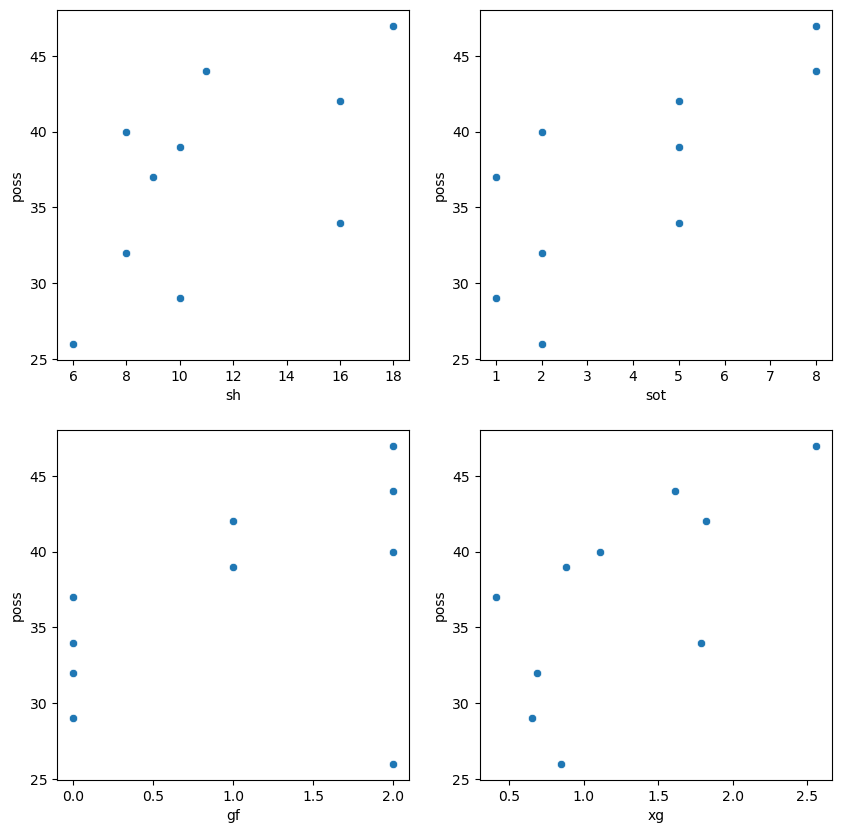

In [85]:
HomeShots_Goals = averageHomeOverall[["gf","xg","sh","sot","opponent","venue","poss"]]

print('\033[1m',Home_Team + " Overall Possesion Plots 2024/2025:",'\033[0m')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.style.use("dark_background")
#Shots plot
sns.scatterplot(x = "sh", y = "poss", data = HomeShots_Goals, ax=axs[0, 0])

#Shots on target plot
sns.scatterplot(x = "sot", y = "poss", data = HomeShots_Goals, ax=axs[0, 1])

#Expected Goals for boxplot
sns.scatterplot(x = "gf", y = "poss", data = HomeShots_Goals, ax=axs[1, 0])

#Expected Goals for boxplot
sns.scatterplot(x = "xg", y = "poss", data = HomeShots_Goals, ax=axs[1, 1]);

## Away Teams shots - goals and possesion stats

In [86]:
averageAwayOverall["Shots On Target Percentage"]= (averageAwayOverall["sot"] / averageAwayOverall["sh"]*100).round()
averageAwayOverall["Shots On Target To Goals Percentage"]= (averageAwayOverall["gf"] / averageAwayOverall["sot"]*100).round()
AwayShotsToGoals = averageAwayOverall[["venue","result","opponent", "gf",
                                   "poss","sh","sot", "Shots On Target Percentage",
                                  "Shots On Target To Goals Percentage"]]

print('\033[1m',Away_Team + " Shot to goals and possesion Stats 2024/2025:",'\033[0m')
AwayShotsToGoals

 Crystal Palace Shot to goals and possesion Stats 2024/2025: 


,venue,result,opponent,gf,poss,sh,sot,Shots On Target Percentage,Shots On Target To Goals Percentage
60,Home,L,Brentford,1.0,54.0,14.0,6.0,43.0,17.0
61,Home,L,West Ham United,0.0,59.0,14.0,2.0,14.0,0.0
62,Away,D,Chelsea,1.0,37.0,9.0,3.0,33.0,33.0
63,Home,D,Leicester City,2.0,67.0,20.0,4.0,20.0,50.0
64,Home,D,Manchester United,0.0,33.0,9.0,4.0,44.0,0.0
65,Away,L,Everton,1.0,60.0,17.0,5.0,29.0,20.0
66,Home,L,Liverpool,0.0,31.0,9.0,5.0,56.0,0.0
67,Away,L,Nottingham Forest,0.0,51.0,20.0,6.0,30.0,0.0
68,Home,W,Tottenham Hotspur,1.0,33.0,14.0,6.0,43.0,17.0
69,Away,D,Wolverhampton Wanderers,2.0,43.0,19.0,7.0,37.0,29.0


 Crystal Palace Possesion Overall Plots 2024/2025: 


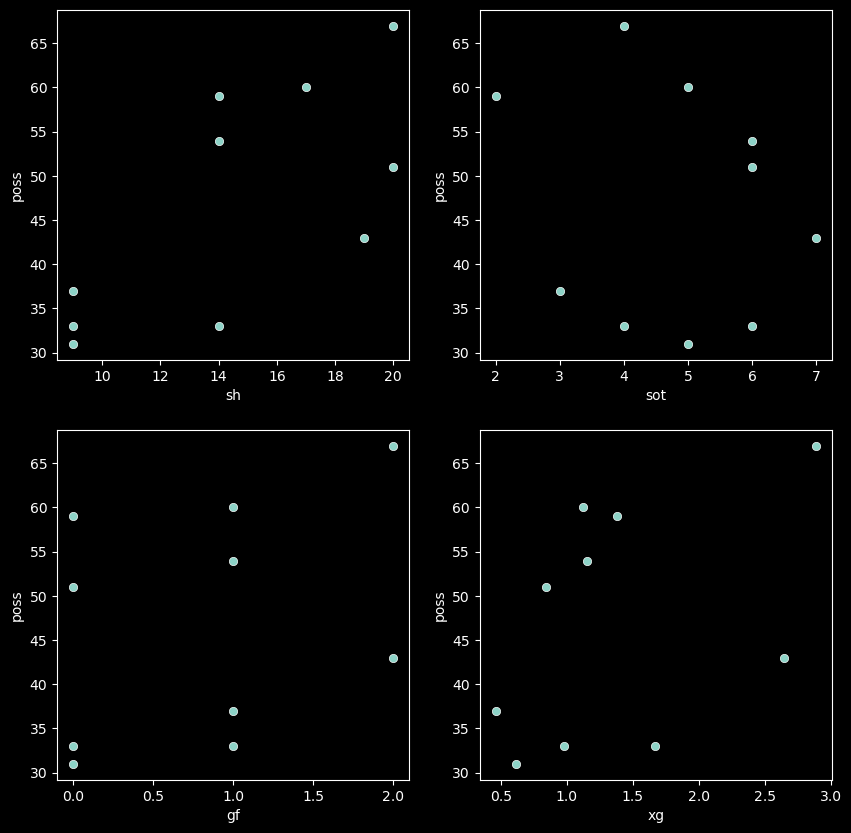

In [87]:
AwayShots_Goals = averageAwayOverall[["gf","xg","sh","sot","opponent","venue","poss"]]

print('\033[1m',Away_Team + " Possesion Overall Plots 2024/2025:",'\033[0m')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#Shots plot
sns.scatterplot(x = "sh", y = "poss", data = AwayShots_Goals, ax=axs[0, 0])

#Shots on target plot
sns.scatterplot(x = "sot", y = "poss", data = AwayShots_Goals, ax=axs[0, 1])

#Expected Goals for boxplot
sns.scatterplot(x = "gf", y = "poss", data = AwayShots_Goals, ax=axs[1, 0])

#Expected Goals for boxplot
sns.scatterplot(x = "xg", y = "poss", data = AwayShots_Goals, ax=axs[1, 1]);

# Teams vs Opponents based on league positions

In [88]:
prem_positions = run_Season_dataset(Chosen_season)

Running dataset containing data from 2023/2024 Season


In [89]:
prem_positions.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
988,2023-08-11,Away,W,3,0,Burnley,1.9,0.3,65,17,8,13.9,Manchester City,Fri 20:00,19
989,2023-08-19,Home,W,1,0,Newcastle United,1.0,0.3,59,14,4,17.9,Manchester City,Sat 20:00,7
990,2023-08-27,Away,W,2,1,Sheffield Utd,3.5,0.7,79,29,9,17.3,Manchester City,Sun 14:00,20
991,2023-09-02,Home,W,5,1,Fulham,2.2,1.4,68,6,4,14.8,Manchester City,Sat 15:00,13
992,2023-09-16,Away,W,3,1,West Ham United,3.6,0.9,68,29,13,16.4,Manchester City,Sat 15:00,9


In [90]:
prem_positions["opponent"].unique()

array(['Burnley', 'Newcastle United', 'Sheffield Utd', 'Fulham',
       'West Ham United', 'Nottingham Forest', 'Wolverhampton Wanderers',
       'Arsenal', 'Brighton and Hove Albion', 'Manchester United',
       'Bournemouth', 'Chelsea', 'Liverpool', 'Tottenham Hotspur',
       'Aston Villa', 'Luton Town', 'Crystal Palace', 'Everton',
       'Brentford', 'Manchester City'], dtype=object)

In [91]:
HOME_team_Perf = prem_positions[(prem_positions["team"] == Home_Team)]
team_PerformanceVS_prem_positions = HOME_team_Perf[(HOME_team_Perf["venue"] == "Home")]

AWAY_team_Perf = prem_positions[(prem_positions["team"] == Away_Team)]
Awayteam_PerformanceVS_prem_positions = AWAY_team_Perf[(AWAY_team_Perf["venue"] == "Away")]
team_PerformanceVS_prem_positions.head()

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
1520,2023-08-12,Home,L,0,1,Fulham,2.7,1.5,42,19,9,15.8,Everton,Sat 15:00,13
1522,2023-08-26,Home,L,0,1,Wolverhampton Wanderers,1.3,1.1,47,15,7,13.8,Everton,Sat 15:00,14
1524,2023-09-17,Home,L,0,1,Arsenal,0.3,1.0,26,8,1,21.6,Everton,Sun 16:30,2
1526,2023-09-30,Home,L,1,2,Luton Town,2.9,0.9,67,23,4,14.4,Everton,Sat 15:00,18
1527,2023-10-07,Home,W,3,0,Bournemouth,2.4,0.7,48,25,8,15.8,Everton,Sat 15:00,12


In [92]:
g= team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["opponent"] == Away_Team)]
g

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
1544,2024-02-19,Home,D,1,1,Crystal Palace,1.7,0.7,61,19,4,16.4,Everton,Mon 20:00,10


In [93]:
#Home Team performance vs top 4 teams from 2023/2024
HOME_team_PerformanceVS_top4 = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 1) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 4)];

#Home Team performance vs outiside top 4 teams from 2023/2024
HOME_team_PerformanceVS_TopMidTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 5) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 10)];

#Home Team performance vs mid table from 2023/2024
HOME_team_PerformanceVS_midTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 11) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 16)];

#Home Team performance vs bottom teams from 2023/2024
HOME_team_PerformanceVS_bottomTable = team_PerformanceVS_prem_positions[(team_PerformanceVS_prem_positions["Premier League Finish Position"] >= 17) & (team_PerformanceVS_prem_positions["Premier League Finish Position"] <= 20)];

In [94]:
def run_Table_position(g):
        
    if g["Premier League Finish Position"].between(0,4).any():
        #tablePosition == "Top Four Clubs"
        print("Top Four Clubs")
        return HOME_team_PerformanceVS_top4
    
    elif g["Premier League Finish Position"].between(5,10).any():
        #tablePosition == "Upper Mid Table Clubs"
        print("Upper Mid Table Clubs")
        return HOME_team_PerformanceVS_TopMidTable
        
    elif g["Premier League Finish Position"].between(11,16).any():
        #tablePosition == "Lower Mid Table Clubs"
        print("Lower Mid Table Clubs")
        return HOME_team_PerformanceVS_midTable
        
    else:
        #tablePosition = "Bottom Four Clubs"
        print("Bottom Four Clubs")
        return HOME_team_PerformanceVS_bottomTable

# result1 = run_Table_position(g)
# print(result1)

In [95]:
homePerfRecord = run_Table_position(g)
# homePerfRecordResult = homePerfRecord["result"].value_counts(normalize=True)*100
# homePerfRecordResult

Upper Mid Table Clubs


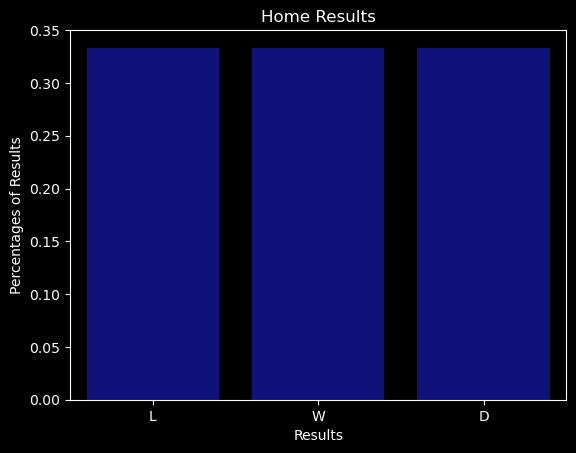

In [96]:
x, y = "result", "Per Centages"

(homePerfRecord[x]
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y,
       color="darkblue").set(title='Home Results', 
                            xlabel='Results', ylabel='Percentages of Results'));

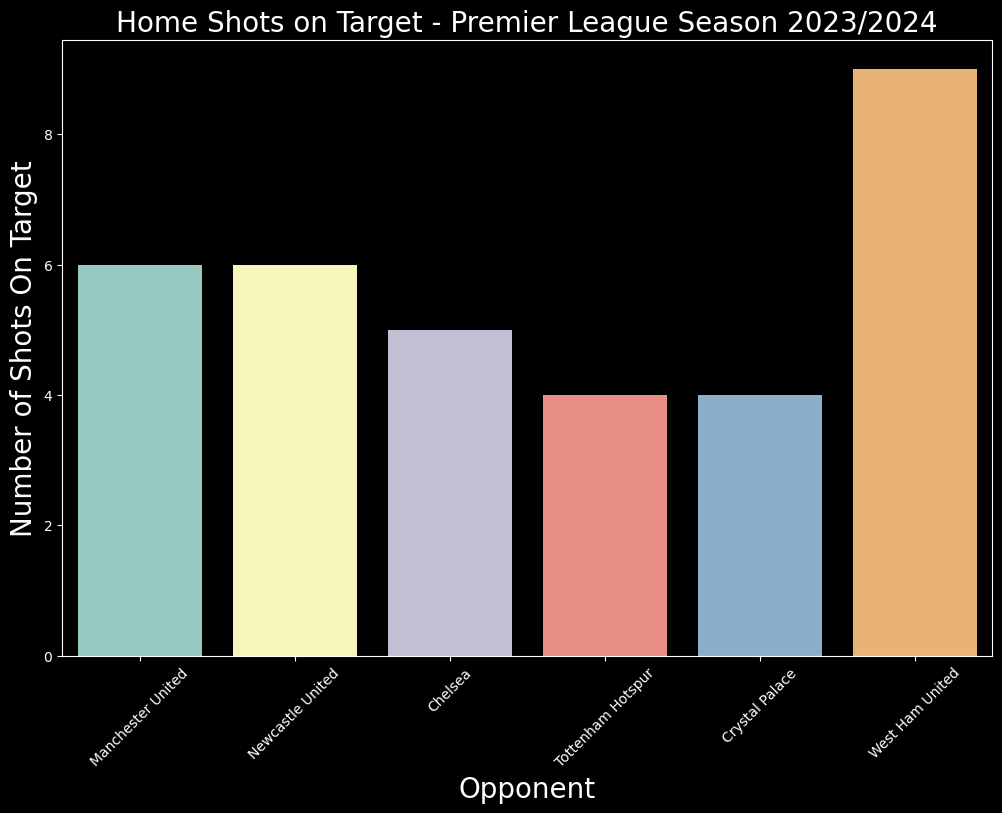

In [97]:
plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(data=homePerfRecord, x="opponent",y = "sot")
plt.xticks(rotation=45)
plt.xlabel("Opponent", fontsize=20)
plt.ylabel("Number of Shots On Target", fontsize=20)
plt.title("Home Shots on Target - " + Chosen_season, fontsize = 20)
plt.show()

In [98]:
homePerfRecord.reset_index(drop = True, inplace = True)
homePerfRecord

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,Premier League Finish Position
0,2023-11-26,Home,L,0,3,Manchester United,2.4,2.2,51,24,6,16.9,Everton,Sun 16:30,8
1,2023-12-07,Home,W,3,0,Newcastle United,3.3,1.5,38,21,6,13.3,Everton,Thu 19:30,7
2,2023-12-10,Home,W,2,0,Chelsea,1.2,0.9,29,9,5,16.4,Everton,Sun 14:00,6
3,2024-02-03,Home,D,2,2,Tottenham Hotspur,2.6,1.0,43,14,4,14.3,Everton,Sat 12:30,5
4,2024-02-19,Home,D,1,1,Crystal Palace,1.7,0.7,61,19,4,16.4,Everton,Mon 20:00,10
5,2024-03-02,Home,L,1,3,West Ham United,2.7,1.9,55,21,9,21.8,Everton,Sat 15:00,9


In [99]:
possescionHOME= homePerfRecord[["opponent","poss"]]
# possescionHOME["awayPos"] = 100 - possescionHOME["poss"]
# r = len(possescionHOME["opponent"])-1
# possescionHOME["opponent"][r]

In [100]:
df123 = possescionHOME[["opponent","poss"]]
df123.head()

,opponent,poss
0,Manchester United,51
1,Newcastle United,38
2,Chelsea,29
3,Tottenham Hotspur,43
4,Crystal Palace,61


In [101]:
print(df123["poss"].mean().round(),"%")

46.0 %


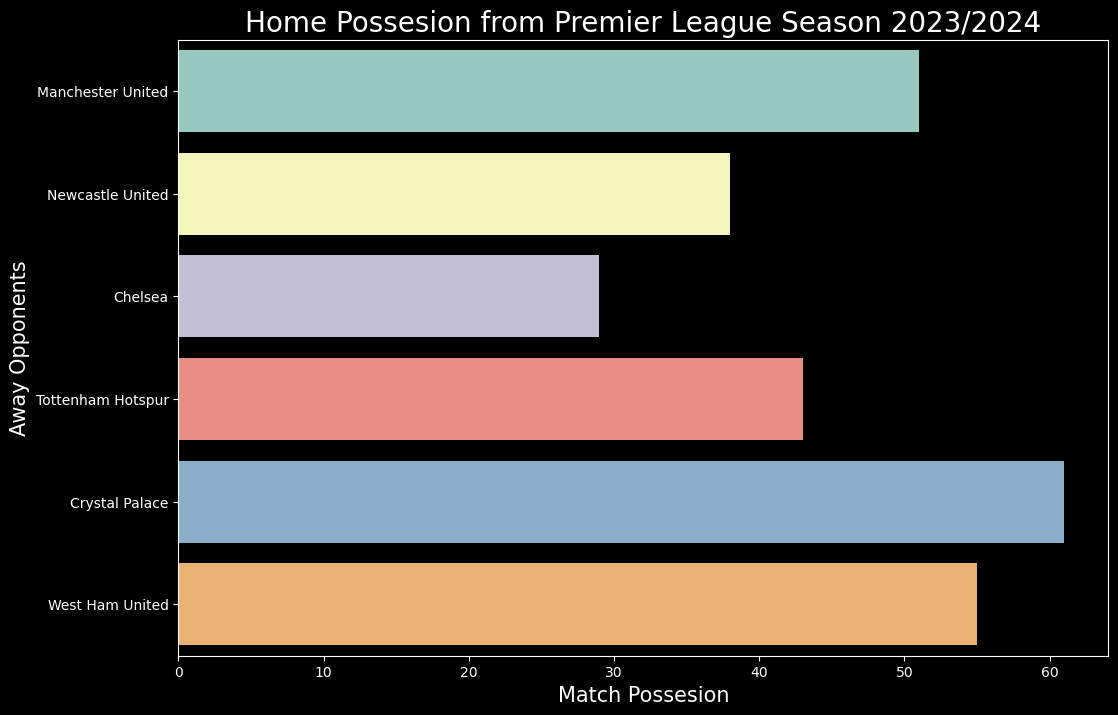

In [102]:
plt.style.use("dark_background")
plt.figure(figsize = (12,8))
sns.barplot(x = "poss", y = "opponent", data = df123)
plt.ylabel("Away Opponents", fontsize=15)
plt.xlabel("Match Possesion", fontsize=15)
plt.title("Home Possesion from " + Chosen_season, fontsize=20)
plt.show()

## Does higher possesion lead to winning matches?

In [103]:
possWin_Rate = dropped_teams

In [104]:
#Per centage of possesion between 50% - 60%
mid_possWin_Rate = possWin_Rate[(possWin_Rate["poss"] > 50) & (possWin_Rate["poss"] <= 60)];
HomeMidPossPerC = mid_possWin_Rate[mid_possWin_Rate["venue"] == "Home"].groupby("team")["result"].apply(lambda x: (x == "W").sum())
HomeMidPossgames = mid_possWin_Rate[mid_possWin_Rate["venue"] == "Home"].groupby("team")["result"].count()

In [105]:
HOMEperCENTmidPoss=HomeMidPossPerC/HomeMidPossgames*100
#HomePossPerC
#HOMEperCENTmidPoss

In [106]:
#Per centage of possesion above 60% 
high_possWin_Rate = possWin_Rate[(possWin_Rate["poss"] > 60)];
HomeHighPossPerC = high_possWin_Rate[high_possWin_Rate["venue"] == "Home"].groupby("team")["result"].apply(lambda x: (x == "W").sum())
HomeHighPossgames = high_possWin_Rate[high_possWin_Rate["venue"] == "Home"].groupby("team")["result"].count()

In [107]:
HOMEperCENTHighPoss=HomeHighPossPerC/HomeHighPossgames*100
#HOMEperCENTHighPoss

In [108]:
homePossWinPerC = pd.merge(HOMEperCENTmidPoss,HOMEperCENTHighPoss, on="team", suffixes=("_Home Wins_50% - 60% Possesion","_Home Wins_Above 60% Possesion")).sort_values(by="result_Home Wins_50% - 60% Possesion" ,ascending = False).reset_index()

In [109]:
homePossWinPerC

,team,result_Home Wins_50% - 60% Possesion,result_Home Wins_Above 60% Possesion
0,Liverpool,74.074074,74.576271
1,Manchester City,73.684211,79.166667
2,Arsenal,70.967742,65.789474
3,Tottenham Hotspur,66.666667,64.285714
4,Chelsea,59.090909,46.296296
5,Manchester United,55.172414,55.882353
6,Leicester City,52.173913,47.826087
7,Aston Villa,50.000000,50.000000
8,Newcastle United,50.000000,40.000000
9,Crystal Palace,48.275862,33.333333


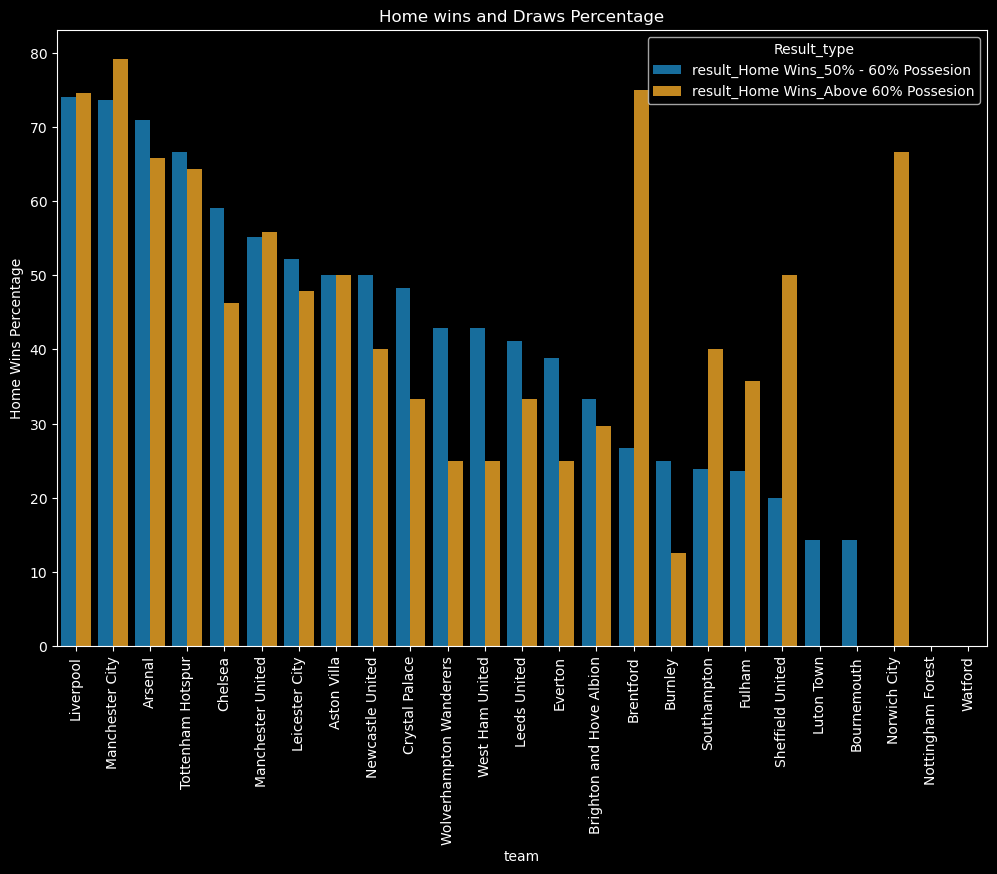

In [110]:
homePossCombined = homePossWinPerC.melt(id_vars = "team", var_name = "Result_type", value_name = "Home Wins Percentage")


plt.figure(figsize = (12,8))
sns.barplot(x = "team", y = "Home Wins Percentage", 
            hue = "Result_type", 
            data = homePossCombined, palette = "colorblind")
plt.xticks(rotation=90)
plt.title("Home wins and Draws Percentage")
plt.show()

# Model Predictions

In [111]:
dropped_teams.describe()

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.436579,1.436579,1.394789,1.394789,50.001053,12.607895,4.232632,17.260305,0.449211,0.123684,0.151316
std,1.298623,1.298623,0.827473,0.827473,12.767692,5.563999,2.463546,3.028018,0.661465,0.351685,0.387347
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,9.000000,2.000000,15.300000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,12.000000,4.000000,17.100000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.900000,1.900000,60.000000,16.000000,6.000000,19.000000,1.000000,0.000000,0.000000
max,9.000000,9.000000,7.000000,7.000000,82.000000,36.000000,15.000000,39.900000,4.000000,3.000000,3.000000


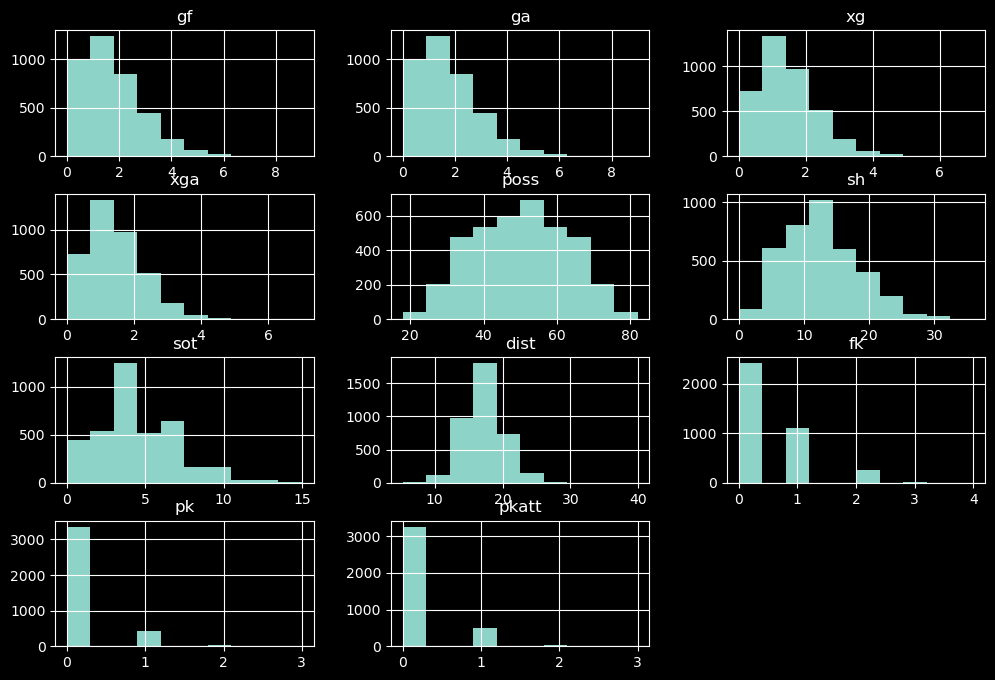

In [112]:
dropped_teams.hist(figsize=(12,8));

<Axes: xlabel='sot'>

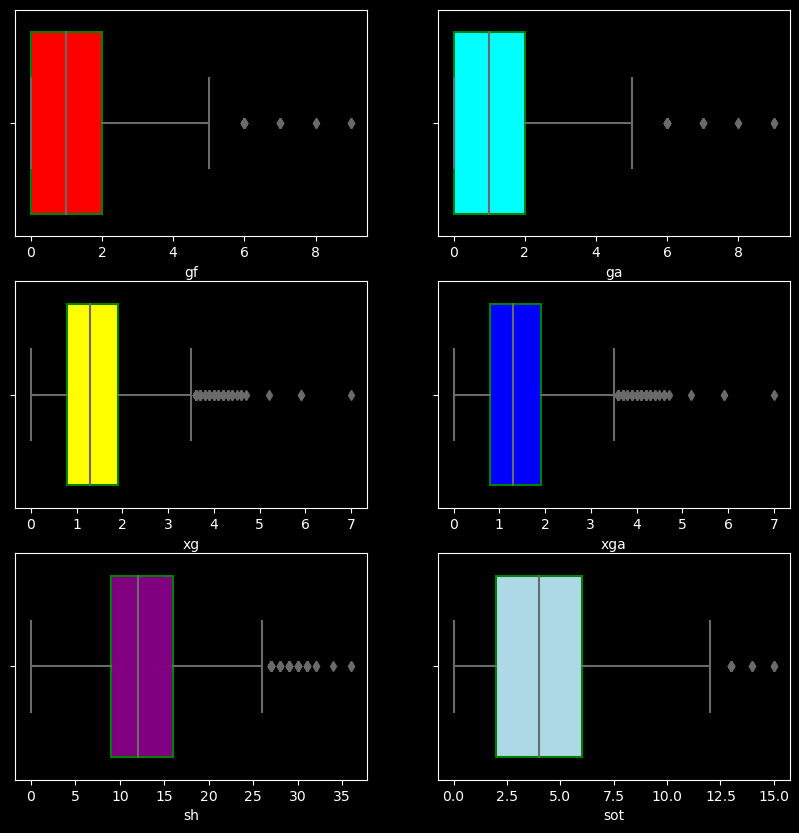

In [113]:
#I created a box plot grid to view for outliers. I selected the features in this grid by looking at each features max and median values.
#The features I selected were Goals for, Expected goals for, expected goals against and Shot.
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

#Goals for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["gf"], ax=axs[0, 0]
            ,boxprops={'color': 'green', 'facecolor': 'red'})
#axs[0,0].set_title("Goals For")

#Goals for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["ga"], ax=axs[0, 1]
            ,boxprops={'color': 'green', 'facecolor': 'cyan'})
#axs[0,1].set_title("Goals Against")

#Expected Goals for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["xg"], ax=axs[1, 0]
            ,boxprops={'color': 'green', 'facecolor': 'yellow'})
#axs[1,0].set_title("Expected Goals For")

#Expected Goals Against boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["xga"], ax=axs[1, 1]
            ,boxprops={'color': 'green', 'facecolor': 'blue'})
#axs[1,1].set_title("Expected Goals Against")

#Shots for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["sh"], ax=axs[2,0]
            ,boxprops={'color': 'green', 'facecolor': 'purple'})
#axs[2,0].set_title("Shots")

#Shots for boxplot
sns.boxplot(data = dropped_teams, x = dropped_teams["sot"], ax=axs[2,1]
            ,boxprops={'color': 'green', 'facecolor': 'lightblue'})
#axs[2,1].set_title("Shots on target")

In [114]:
df_outlier_detection = dropped_teams

In [115]:
df_outlier_detection.reset_index(drop=True, inplace=True)

In [116]:
featureOutlier = df_outlier_detection[["gf","ga","xg","xga","sh","sot","poss"]]
featureOutlier.reset_index(drop=True, inplace=True)
featureOutlier.head()

,gf,ga,xg,xga,sh,sot,poss
0,3,1,1.9,0.6,13,8,65
1,2,5,0.9,2.9,16,5,72
2,1,1,1.2,2.4,23,1,49
3,1,0,1.3,0.9,13,5,58
4,1,1,1.0,0.3,14,7,69


In [117]:
Q1 = featureOutlier.quantile(0.25)
Q3 = featureOutlier.quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(featureOutlier >= upper)[0]
lower_array = np.where(featureOutlier <= lower)[0]


# # # Removing the outliers
df_outlier_detection.drop(index=upper_array, axis = 0,inplace=True)
df_outlier_detection.drop(index=lower_array, axis = 0,inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_outlier_detection.shape)

New Shape:  (3478, 18)


In [118]:
df_outlier_detection.reset_index(drop=True, inplace=True)
df_outlier_detection.describe()

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,1.320299,1.337550,1.319896,1.347700,49.792697,12.253594,4.044853,17.297861,0.445946,0.117309,0.143186
std,1.116095,1.125657,0.722748,0.738828,12.519522,5.037174,2.230144,2.993271,0.657108,0.340928,0.374900
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.800000,40.000000,8.000000,2.000000,15.300000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,12.000000,4.000000,17.200000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,15.000000,5.000000,19.100000,1.000000,0.000000,0.000000
max,4.000000,4.000000,3.500000,3.500000,82.000000,26.000000,11.000000,35.200000,4.000000,3.000000,3.000000


In [119]:
Ml_Df = df_outlier_detection

In [120]:
Ml_Df.columns

Index(['date', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss',
       'sh', 'sot', 'dist', 'team', 'DAY & TIME', 'fk', 'pk', 'pkatt',
       'formation'],
      dtype='object')

In [121]:
categorical_features = Ml_Df[["venue",
                              "result",
                              "opponent",
                               "team",
                             "DAY & TIME",
                             "date",
                             "formation"]]

df_corr = Ml_Df.drop(categorical_features, axis = 1)

In [122]:
df_corr

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
0,3,1,1.9,0.6,65,13,8,21.1,2,1,1
1,1,1,1.2,2.4,49,23,1,18.2,1,0,0
2,1,0,1.3,0.9,58,13,5,17.7,0,0,0
3,1,1,1.0,0.3,69,14,7,20.9,1,0,0
4,1,0,1.6,0.5,65,16,8,18.5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3473,0,1,0.6,1.0,58,12,1,18.4,0,0,0
3474,1,2,1.2,1.2,56,12,3,16.9,1,0,0
3475,0,4,0.6,3.5,53,11,2,19.8,1,0,1
3476,0,1,0.1,2.5,33,2,0,20.6,2,0,0


Text(0.5, 1.0, 'Correlation Map Containing All Features')

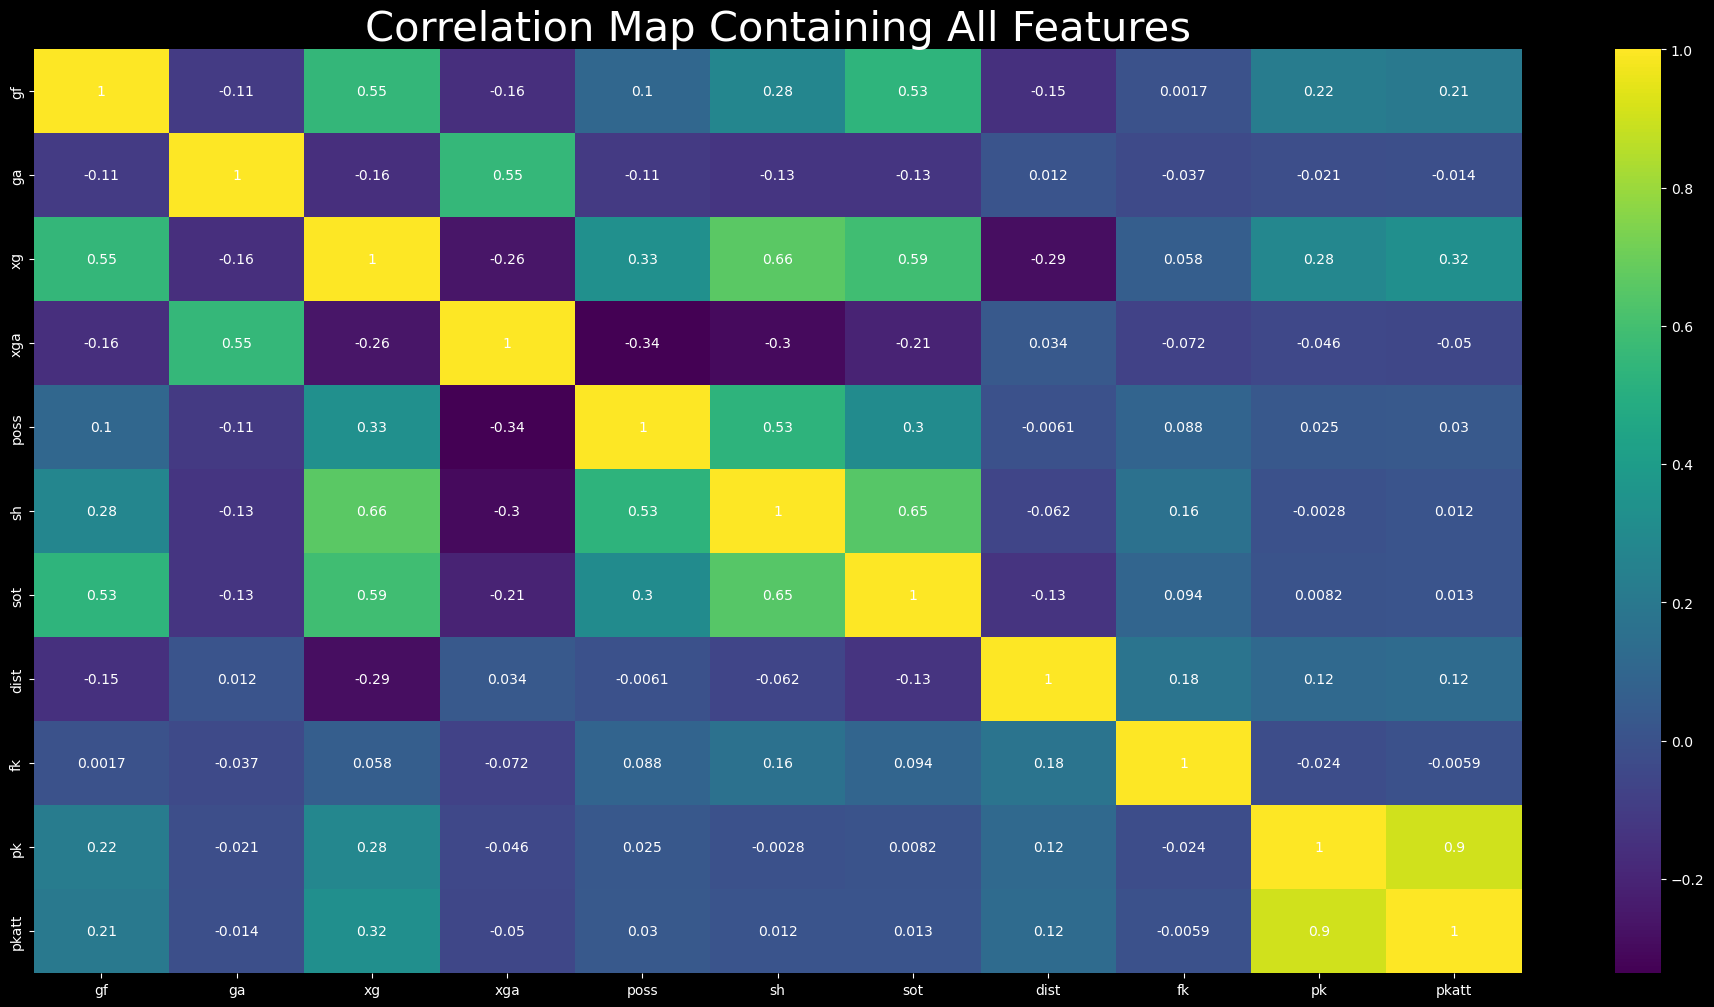

In [123]:
#create heatmap containing correlation matrix between features  
plt.figure(figsize=(24,12))
sns.heatmap(df_corr.corr(), annot=True, cmap = "viridis",annot_kws={'color': 'white'} )
plt.title("Correlation Map Containing All Features", fontsize=30)

## Linear Regression to Predict Goals Scored

In [124]:
LinReg_df = df_outlier_detection

In [125]:
LinReg_df

,date,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,team,DAY & TIME,fk,pk,pkatt,formation
0,2020-09-21,Away,W,3,1,Wolverhampton Wanderers,1.9,0.6,65,13,8,21.1,Manchester City,Mon 20:15,2,1,1,4-2-3-1
1,2020-10-03,Away,D,1,1,Leeds United,1.2,2.4,49,23,1,18.2,Manchester City,Sat 17:30,1,0,0,4-3-3
2,2020-10-17,Home,W,1,0,Arsenal,1.3,0.9,58,13,5,17.7,Manchester City,Sat 17:30,0,0,0,3-1-4-2
3,2020-10-24,Away,D,1,1,West Ham United,1.0,0.3,69,14,7,20.9,Manchester City,Sat 12:30,1,0,0,4-3-3
4,2020-10-31,Away,W,1,0,Sheffield Utd,1.6,0.5,65,16,8,18.5,Manchester City,Sat 12:30,2,0,0,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,2020-07-04,Home,L,0,1,Brighton and Hove Albion,0.6,1.0,58,12,1,18.4,Norwich City,Sat 12:30,0,0,0,4-3-3
3474,2020-07-07,Away,L,1,2,Watford,1.2,1.2,56,12,3,16.9,Norwich City,Tue 18:00,1,0,0,4-3-3
3475,2020-07-11,Home,L,0,4,West Ham United,0.6,3.5,53,11,2,19.8,Norwich City,Sat 12:30,1,0,1,4-3-3
3476,2020-07-14,Away,L,0,1,Chelsea,0.1,2.5,33,2,0,20.6,Norwich City,Tue 20:15,2,0,0,4-3-3


In [126]:
LinReg_drop_features = LinReg_df[["DAY & TIME","date","formation"]]

LinReg_df.drop(LinReg_drop_features, axis = 1, inplace=True)

In [127]:
features_toEncode = ["result",'venue', 'opponent', 'team']

#Storing the new a new dataset of encoded values in feature_ne
encoder = OneHotEncoder(drop='first', sparse=True, dtype=np.int32)
fresh_features = encoder.fit_transform(LinReg_df[features_toEncode])
column_heading = encoder.get_feature_names_out(features_toEncode)

/Users/manwell/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
New_df = pd.DataFrame(fresh_features.toarray(), columns=column_heading)

In [129]:
#joining the new encoded features with the existing dataset
complete_df = pd.concat([LinReg_df,New_df], axis =1)
complete_df.shape

(3478, 68)

In [130]:
complete_df.drop(columns = ["venue","opponent", "team", "result"], inplace= True)

In [131]:
# #Converting to integers
# integer_conversion = ["xg","xga","dist"]

# for values in integer_conversion:
#     complete_df[values]=complete_df[values].astype(int)

In [132]:
complete_df.head()

,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt,result_L,result_W,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton and Hove Albion,opponent_Burnley,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Luton Town,opponent_Manchester City,opponent_Manchester United,opponent_Newcastle United,opponent_Norwich City,opponent_Nottingham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham Hotspur,opponent_Watford,opponent_West Bromwich Albion,opponent_West Ham United,opponent_Wolverhampton Wanderers,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Luton Town,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,3,1,1.9,0.6,65,13,8,21.1,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1.2,2.4,49,23,1,18.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1.3,0.9,58,13,5,17.7,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1.0,0.3,69,14,7,20.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1.6,0.5,65,16,8,18.5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [133]:
complete_df[["fk","pk","pkatt"]] = dropped_teams[["fk","pk","pkatt"]]

In [134]:
complete_df[["ga", "poss", "sh", "sot"]] = complete_df[["ga", "poss", "sh", "sot"]].astype(float)

# Building Models

 ## Linear Regression

In [135]:
X = complete_df.drop(columns = ["gf","fk","pk","pkatt","dist"])
y = complete_df["gf"]

In [136]:
X.head()

,ga,xg,xga,poss,sh,sot,result_L,result_W,venue_Home,opponent_Aston Villa,opponent_Bournemouth,opponent_Brentford,opponent_Brighton and Hove Albion,opponent_Burnley,opponent_Chelsea,opponent_Crystal Palace,opponent_Everton,opponent_Fulham,opponent_Leeds United,opponent_Leicester City,opponent_Liverpool,opponent_Luton Town,opponent_Manchester City,opponent_Manchester United,opponent_Newcastle United,opponent_Norwich City,opponent_Nottingham Forest,opponent_Sheffield Utd,opponent_Southampton,opponent_Tottenham Hotspur,opponent_Watford,opponent_West Bromwich Albion,opponent_West Ham United,opponent_Wolverhampton Wanderers,team_Aston Villa,team_Bournemouth,team_Brentford,team_Brighton and Hove Albion,team_Burnley,team_Chelsea,team_Crystal Palace,team_Everton,team_Fulham,team_Leeds United,team_Leicester City,team_Liverpool,team_Luton Town,team_Manchester City,team_Manchester United,team_Newcastle United,team_Norwich City,team_Nottingham Forest,team_Sheffield United,team_Southampton,team_Tottenham Hotspur,team_Watford,team_West Bromwich Albion,team_West Ham United,team_Wolverhampton Wanderers
0,1.0,1.9,0.6,65.0,13.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.2,2.4,49.0,23.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.0,1.3,0.9,58.0,13.0,5.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.3,69.0,14.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1.6,0.5,65.0,16.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [137]:
# random_state is the seed used by the random number generator, it can be any integer.
# Splitting data into testing and training. First I will employ an 80/20 split. 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80 , random_state = 100)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3478, 59), (3478,), (2782, 59), (696, 59), (2782,), (696,))

In [138]:
from sklearn.linear_model import LinearRegression

Lr_reg1 = LinearRegression()

Lr_reg1.fit(X_train, y_train)
y_pred = Lr_reg1.predict(X_test)

In [139]:
print("Lr_reg : Training set score: {:.2f}".format(Lr_reg1.score(X_train, y_train))) 
print("Lr_reg : Test set score: {:.2f}".format(Lr_reg1.score(X_test, y_test)))

Lr_reg : Training set score: 0.73
Lr_reg : Test set score: 0.70


In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mean_ab_error = mean_absolute_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
root_mean_sq_error = mean_sq_error ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mean_ab_error}")
print(f"Mean Squared Error (MSE): {mean_sq_error}")
print(f"Root Mean Squared Error (RMSE): {root_mean_sq_error}")
print(f"R^2 (Coefficient of Determination): {r2}")

Mean Absolute Error (MAE): 0.4744576167901031
Mean Squared Error (MSE): 0.3643405811871201
Root Mean Squared Error (RMSE): 0.6036063130775887
R^2 (Coefficient of Determination): 0.7004460287849976


In [141]:
Prem_df__Goals_scored = pd.DataFrame({'Goals_scored Actual': y_test, 'Goals_scored Predicted': y_pred})

Prem_df__Goals_scored["Goals_scored Predicted"] = Prem_df__Goals_scored["Goals_scored Predicted"].round()
Prem_df__Goals_scored.head(10)

,Goals_scored Actual,Goals_scored Predicted
1169,2,2.0
16,2,2.0
2417,1,0.0
3303,2,2.0
328,1,1.0
676,0,0.0
367,1,1.0
323,0,0.0
2984,1,1.0
2924,0,1.0


# =========================================================

## Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

X_train_RF_Reg, X_test_RF_Reg, y_train_RF_Reg, y_test_RF_Reg = train_test_split(X, y, train_size = 0.80 , random_state = 100)

RF_reg = RandomForestRegressor(n_estimators = 100).fit(X_train_RF_Reg, y_train_RF_Reg)

y_pred_RF_Reg = RF_reg.predict(X_test_RF_Reg)

In [143]:
print("Random Forrest Regression : Training set score: {:.2f}".format(RF_reg.score(X_train_RF_Reg, y_train_RF_Reg))) 
print("Random Forrest Regression : {:.2f}".format(RF_reg.score(X_test_RF_Reg, y_test_RF_Reg)))

Random Forrest Regression : Training set score: 0.97
Random Forrest Regression : 0.71


In [144]:
# Calculate evaluation metrics
mean_ab_error = mean_absolute_error(y_test_RF_Reg, y_pred_RF_Reg)
mean_sq_error = mean_squared_error(y_test_RF_Reg, y_pred_RF_Reg)
root_mean_sq_error = mean_sq_error ** 0.5
r2 = r2_score(y_test_RF_Reg, y_pred_RF_Reg)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mean_ab_error}")
print(f"Mean Squared Error (MSE): {mean_sq_error}")
print(f"Root Mean Squared Error (RMSE): {root_mean_sq_error}")
print(f"R^2 (Coefficient of Determination): {r2}")

Mean Absolute Error (MAE): 0.38504310344827586
Mean Squared Error (MSE): 0.35178491379310345
Root Mean Squared Error (RMSE): 0.5931145874054216
R^2 (Coefficient of Determination): 0.7107690622963285


### Hyperparamter Tuning

In [145]:
RF_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [146]:
# #I using the .best_estimator parameter to find the correct amount of features and n_estimators to use to ensure the model is workign to highest standard it can.
# #Using grid search cross validation to find the best parameters for the decision tree.
# #Using grid search cross validation to find the best parameters for the decision tree.
# from sklearn.model_selection import GridSearchCV

# RF_Reg1 = RandomForestRegressor()

# value_grid ={ 
#  'n_estimators': [100,200,300],
#  'max_depth':[None, 5,10],
#  'max_features': [1, 100],
#  'min_samples_split': [4],
#  'min_samples_leaf': [2]
# #  ,'max_leaf_nodes': [41],
# #  'min_samples_leaf': [500],
# #  'min_weight_fraction_leaf':[0.1, 0.45],
# #  'n_estimators': [100],
# }

# search_grid = GridSearchCV(RF_Reg1, value_grid, cv = 5,
#                           scoring = "neg_mean_squared_error",
#                            error_score='raise',
#                           return_train_score=True)

# search_grid.fit(X_train_RF_Reg, y_train_RF_Reg)

In [147]:
# #I using the .best_estimator parameter to find the correct amount of features and n_estimators to use to ensure the model is workign to highest standard it can.
# cross_val_rf_model = search_grid.best_estimator_
# cross_val_rf_model.score(X_test_RF_Reg, y_test_RF_Reg)

In [148]:
# cross_val_rf_model.fit(X_train_RF_Reg, y_train_RF_Reg)
# y_pred_RF_Reg1 = cross_val_rf_model.predict(X_test_RF_Reg)
# #y_pred_RF_Reg

In [149]:
# RF_goals = pd.DataFrame({'total_goals Actual': y_test_RF_Reg, 'total_goals Predicted': y_pred_RF_Reg1})
# RF_goals.head(10)

In [150]:
# plt.scatter(RF_goals['total_goals Actual'],RF_goals['total_goals Predicted'], color='yellow', alpha=0.7)
# plt.plot([RF_goals['total_goals Actual'].min(), RF_goals['total_goals Predicted'].max()],
#          [RF_goals['total_goals Actual'].min(), RF_goals['total_goals Predicted'].max()],
#          color='red', linestyle='--', label='y = x (Line of Perfect Prediction)')
# plt.xlabel("Goals Scored Actual")
# plt.ylabel("Goals Scored Predicted")
# plt.title("Scatter Plot Of Actual and Predicted Values for Goals Scored")
# plt.grid(True)
# plt.show()

# ========================================================

# Classification task on result

In [151]:
rf_df = complete_df

In [152]:
fDrop = ["result_L","result_W"]
rf_df.drop(fDrop, axis = 1, inplace= True)
rf_df["Result"] = LinReg_df["result"]

In [153]:
LEncoder = LabelEncoder()
rf_df["Result"] = LEncoder.fit_transform(rf_df["Result"])

## Random Forrest

In [154]:
rf_df.columns

Index(['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'venue_Home', 'opponent_Aston Villa', 'opponent_Bournemouth',
       'opponent_Brentford', 'opponent_Brighton and Hove Albion',
       'opponent_Burnley', 'opponent_Chelsea', 'opponent_Crystal Palace',
       'opponent_Everton', 'opponent_Fulham', 'opponent_Leeds United',
       'opponent_Leicester City', 'opponent_Liverpool', 'opponent_Luton Town',
       'opponent_Manchester City', 'opponent_Manchester United',
       'opponent_Newcastle United', 'opponent_Norwich City',
       'opponent_Nottingham Forest', 'opponent_Sheffield Utd',
       'opponent_Southampton', 'opponent_Tottenham Hotspur',
       'opponent_Watford', 'opponent_West Bromwich Albion',
       'opponent_West Ham United', 'opponent_Wolverhampton Wanderers',
       'team_Aston Villa', 'team_Bournemouth', 'team_Brentford',
       'team_Brighton and Hove Albion', 'team_Burnley', 'team_Chelsea',
       'team_Crystal Palace', 'team_Evert

In [155]:
train = rf_df.drop(columns = ["Result", 'dist', 'fk', 'pk'])
test = rf_df["Result"]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(train, test, train_size = 0.70 , random_state = 42)

In [157]:
# import RandomForestClassifier libraries
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)


# Fit the model using rf_model.fit()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [158]:
print("Random Forrest Training set score: {:.2f}".format(rf_model.score(X_train, y_train)))
print("Random Forrest Test set score: {:.2f}".format(rf_model.score(X_test, y_test)))

Random Forrest Training set score: 1.00
Random Forrest Test set score: 0.98


In [159]:
#Having a quick look at the feature importance/ GINI importance so I can get a better idea of what features can be dropped or changed etc.
feature_relavance = rf_model.feature_importances_

# Sort feature importances in descending order
indices = feature_relavance.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{train.columns[i]}: {feature_relavance[i]}")

Feature Importances:
ga: 0.28934390609787053
gf: 0.25377232695720064
xga: 0.07182873518778828
xg: 0.06980469769468625
sot: 0.04923067403063729
poss: 0.041709196823251464
sh: 0.0411176270021839
venue_Home: 0.010207382669504455
pkatt: 0.008816650164166624
team_Liverpool: 0.004925659340632847
opponent_Brighton and Hove Albion: 0.004846181104072914
opponent_Chelsea: 0.004458660881652634
opponent_Everton: 0.004292219742191491
team_Brighton and Hove Albion: 0.004134027227096499
opponent_Newcastle United: 0.004090377996723237
team_Everton: 0.004063577235117054
team_Chelsea: 0.0040276927817817654
opponent_Manchester City: 0.003936579599341926
team_Southampton: 0.0039024311612797613
opponent_Crystal Palace: 0.0038894213779557497
opponent_Liverpool: 0.0038585188398885264
team_Manchester City: 0.003833028588653126
team_Aston Villa: 0.0038207151191016597
opponent_Manchester United: 0.0037711921505177415
opponent_Southampton: 0.003732703326687695
opponent_Wolverhampton Wanderers: 0.0036934860053944

# ===============================================

# Saving Models

In [160]:
from joblib import dump, load

dump(cross_val_rf_model, filename = "Random Forest Regressor Model.joblib")

NameError: name 'cross_val_rf_model' is not defined

In [ ]:
dump(Lr_reg1, filename = "Linear Regression Model.joblib")